In [90]:
# Chargement des biblioth√®ques n√©cessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import shap
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score, calinski_harabasz_score
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno
import warnings
import model_functions
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [91]:
# Chargement des donn√©es
df=model_functions.read_data('data.csv')
df

Aper√ßu des donn√©es (7431 lignes, 27 colonnes):
Conversion de 'listing_price': float64 -> float64, valeurs NA cr√©√©es: 244
Conversion de 'price_ttc': float64 -> float64, valeurs NA cr√©√©es: 244
Conversion de 'price': float64 -> float64, valeurs NA cr√©√©es: 244
Conversion de 'size': int64 -> int64, valeurs NA cr√©√©es: 0
Conversion de 'rooms': float64 -> float64, valeurs NA cr√©√©es: 14
Conversion de 'bedrooms': float64 -> float64, valeurs NA cr√©√©es: 14
Conversion de 'bathrooms': float64 -> float64, valeurs NA cr√©√©es: 14
Conversion de 'parkings': float64 -> float64, valeurs NA cr√©√©es: 11
Conversion de 'construction_year': float64 -> float64, valeurs NA cr√©√©es: 4968
Conversion de 'age': float64 -> float64, valeurs NA cr√©√©es: 4969
Conversion de 'air_conditioning': float64 -> float64, valeurs NA cr√©√©es: 1863
Conversion de 'central_heating': float64 -> float64, valeurs NA cr√©√©es: 1863
Conversion de 'swimming_pool': float64 -> float64, valeurs NA cr√©√©es: 1863
Conversion d

source       neighborhood          city   state     transaction  \
0     century 21  Ain Zaghouan Nord  Ain Zaghouan   Tunis            sale   
1     century 21  Ain Zaghouan Nord  Ain Zaghouan   Tunis            sale   
2      tecnocasa       Ain Zaghouan  Ain Zaghouan   Tunis            sale   
3     century 21  Ain Zaghouan Nord  Ain Zaghouan   Tunis            sale   
4     century 21  Ain Zaghouan Nord  Ain Zaghouan   Tunis            sale   
...          ...                ...           ...     ...             ...   
7426   tecnocasa    Sousse Corniche  Sousse Ville  Sousse            rent   
7427   tecnocasa    Sousse Corniche  Sousse Ville  Sousse  rent_furnished   
7428   tecnocasa    Sousse Corniche  Sousse Ville  Sousse            rent   
7429       remax    Sousse Corniche  Sousse Ville  Sousse            rent   
7430  century 21              Rtiba       Takelsa  Nabeul            sale   

     property_type        date  listing_price suffix  price_ttc      price  \
0            villa   2/12/2025      1700000.0    TTC  1700000.0  1700000.0   
1            villa   8/24/2024      1580000.0    TTC  1580000.0  1659000.0   
2            villa   4/11/2025      1500000.0    TTC  1500000.0  1500000.0   
3      appartement  11/17/2023      1200000.0    TTC  1200000.0  1323000.0   
4           duplex  11/16/2023      1200000.0    TTC  1200000.0  1323000.0   
...            ...         ...            ...    ...        ...        ...   
7426   appartement   3/27/2025          600.0    TTC      600.0      600.0   
7427   appartement    5/5/2025          600.0    TTC      600.0      600.0   
7428        bureau   4/11/2025          550.0    TTC      550.0      550.0   
7429   appartement   2/24/2025          500.0    TTC      500.0      500.0   
7430         villa  10/20/2024      1200000.0    TTC  1200000.0  1260000.0   

      size  rooms  bedrooms  bathrooms  parkings       finishing  \
0      400    7.0       5.0        4.0       1.0   haut standing   
1      600    7.0       5.0        3.0       3.0  moyen standing   
2      368    0.0       0.0        0.0       0.0  moyen standing   
3      256    6.0       4.0        3.0       1.0   haut standing   
4      256    6.0       4.0        3.0       1.0   haut standing   
...    ...    ...       ...        ...       ...             ...   
7426    90    3.0       2.0        1.0       1.0   haut standing   
7427    60    1.0       1.0        1.0       0.0             NaN   
7428    50    2.0       0.0        1.0       0.0  moyen standing   
7429    60    2.0       1.0        1.0       1.0             NaN   
7430   220    5.0       4.0        2.0       1.0  moyen standing   

                 condition  construction_year   age  air_conditioning  \
0          bonne condition             2012.0  13.0               1.0   
1     excellente condition                NaN   NaN               1.0   
2          bonne condition             2008.0  17.0               NaN   
3                     neuf             2023.0   2.0               1.0   
4                     neuf             2023.0   2.0               1.0   
...                    ...                ...   ...               ...   
7426                   NaN             2024.0   1.0               0.0   
7427                   NaN             2003.0  22.0               1.0   
7428       bonne condition             1956.0  69.0               NaN   
7429                   NaN                NaN   NaN               NaN   
7430       bonne condition             2008.0  17.0               1.0   

      central_heating  swimming_pool  elevator  garden  equipped_kitchen  \
0                 1.0            0.0       0.0     1.0               1.0   
1                 1.0            1.0       0.0     1.0               1.0   
2                 NaN            NaN       NaN     NaN               NaN   
3                 1.0            1.0       1.0     1.0               1.0   
4                 1.0            1.0       1.0     1.0               1.0  

In [4]:
print("\nStatistiques descriptives:")
display(df.describe().T)


Statistiques descriptives:


count           mean            std     min     25%  \
listing_price      7187.0  286068.368860  592021.884843   130.0  1900.0   
price_ttc          7187.0  287366.200501  592702.738124   450.0  1900.0   
price              7187.0  296363.016419  612018.575976   496.0  2000.0   
size               7431.0     211.214103     303.284166    20.0   100.0   
rooms              7417.0       3.657813       2.157921     0.0     3.0   
bedrooms           7417.0       2.396252       1.609724     0.0     1.0   
bathrooms          7417.0       1.448969       1.051078     0.0     1.0   
parkings           7420.0       1.028571       2.660204     0.0     0.0   
construction_year  2463.0    2014.314657      12.515549  1900.0  2010.0   
age                2462.0      10.698213      12.557592     0.0     2.0   
air_conditioning   5568.0       0.877155       0.328288     0.0     1.0   
central_heating    5568.0       0.787716       0.408962     0.0     1.0   
swimming_pool      5568.0       0.105603       0.307357     0.0     0.0   
elevator           5568.0       0.590338       0.491816     0.0     0.0   
garden             5568.0       0.223420       0.416575     0.0     0.0   
equipped_kitchen   5568.0       0.782507       0.412578     0.0     1.0   

                      50%       75%        max  
listing_price      4000.0  382867.0  8500000.0  
price_ttc          4500.0  385000.0  8500000.0  
price              4631.0  395000.0  8500000.0  
size                140.0     210.0     6455.0  
rooms                 3.0       4.0       74.0  
bedrooms              2.0       3.0       22.0  
bathrooms             1.0       2.0       18.0  
parkings              1.0       1.0      180.0  
construction_year  2019.0    2023.0     2025.0  
age                   6.0      15.0      125.0  
air_conditioning      1.0       1.0        1.0  
central_heating       1.0       1.0        1.0  
swimming_pool         0.0       0.0        1.0  
elevator              1.0       1.0        1.0  
garden                0.0       0.0        1.0  
equipped_kitchen      1.0       1.0        1.0

In [5]:
# analyse des donn√©es manquantes: 
model_functions.analyze_missing_data(df)

Type de donn√©es  Valeurs non-NA  Valeurs NA  \
age                       float64            2462        4969   
construction_year         float64            2463        4968   
condition                  object            5457        1974   
finishing                  object            5518        1913   
amenities                  object            5568        1863   
equipped_kitchen          float64            5568        1863   
garden                    float64            5568        1863   
elevator                  float64            5568        1863   
swimming_pool             float64            5568        1863   
central_heating           float64            5568        1863   
air_conditioning          float64            5568        1863   
listing_price             float64            7187         244   
suffix                     object            7187         244   
price_ttc                 float64            7187         244   
price                     float64            7187         244   
bedrooms                  float64            7417          14   
bathrooms                 float64            7417          14   
rooms                     float64            7417          14   
parkings                  float64            7420          11   
neighborhood               object            7431           0   
size                        int64            7431           0   
date                       object            7431           0   
property_type              object            7431           0   
transaction                object            7431           0   
state                      object            7431           0   
city                       object            7431           0   
source                     object            7431           0   

                   Pourcentage NA (%)  Valeurs uniques  
age                             66.87               52  
construction_year               66.86               52  
condition                       26.56                5  
finishing                       25.74                5  
amenities                       25.07             4341  
equipped_kitchen                25.07                2  
garden                          25.07                2  
elevator                        25.07                2  
swimming_pool                   25.07                2  
central_heating                 25.07                2  
air_conditioning                25.07                2  
listing_price                    3.28              836  
suffix                           3.28                4  
price_ttc                        3.28              937  
price                            3.28             1493  
bedrooms                         0.19               16  
bathrooms                        0.19               13  
rooms                            0.19               24  
parkings                         0.15               26  
neighborhood                     0.00              192  
size                             0.00              532  
date                             0.00              879  
property_type                    0.00                7  
transaction                      0.00                3  
state                            0.00                6  
city                             0.00               60  
source                           0.00                4

In [92]:
# Imputation des Prix
# 1er niveau d'imputation
df['price'] = df.groupby(['neighborhood', 'property_type','transaction'])['price'].transform(
    lambda x: x.fillna(x.mean())
)
df['price_ttc'] = df.groupby(['neighborhood', 'property_type','transaction'])['price_ttc'].transform(
    lambda x: x.fillna(x.mean())
)
# 2√®me niveau d'imputation
df['price'] = df.groupby(['city','transaction'])['price'].transform(lambda x: x.fillna(x.mean()))
df['price_ttc'] = df.groupby(['city','transaction'])['price_ttc'].transform(lambda x: x.fillna(x.mean()))
df['listing_price'] = df['listing_price'].fillna(df['price']) # Remplir les valeurs manquantes de 'listing_price' avec la valeur de 'price' si disponible
df['suffix'] = df['suffix'].fillna('TTC') # remplacer suffixe par ttc par defaut
# 3√®me niveau d'imputation
df = df[df['price'].notnull()] #√©liminer les lignes o√π 'price' est toujours manquant


null_price_rows = df[df['price'].isna()]
display(null_price_rows)
print(f"Nombre de lignes avec 'price' manquant apr√®s imputation : {null_price_rows.shape[0]}") # de 244 prix manquants on passe √† 0

# Imputation des variables cat√©gorielles: standing et condition
df=model_functions.impute_condition_simple(df)
df=model_functions.impute_finishing_simple(df)
# Imputation de la variable 'age' et 'construction_year'
df=model_functions.impute_property_year_age(df)
df['construction_year']=2025-df['age']
# Imputation des variables binaires des commodit√©s
df=model_functions.impute_binary_amenities(df,['central_heating','air_conditioning','elevator','swimming_pool','equipped_kitchen','garden'])
# Imputation des variables num√©riques des pieces, chambres, salles de bain et parkings
df=model_functions.simple_impute_rooms(df)
df=model_functions.simple_impute_rooms(df,'bedrooms')
df=model_functions.simple_impute_rooms(df,'parkings')
df=model_functions.simple_impute_rooms(df,'bathrooms')
df.drop(columns=['amenities'], inplace=True)

Empty DataFrame
Columns: [source, neighborhood, city, state, transaction, property_type, date, listing_price, suffix, price_ttc, price, size, rooms, bedrooms, bathrooms, parkings, finishing, condition, construction_year, age, air_conditioning, central_heating, swimming_pool, elevator, garden, equipped_kitchen, amenities]
Index: []

Nombre de lignes avec 'price' manquant apr√®s imputation : 0
Imputation de 1969 valeurs manquantes dans la colonne 'condition'...
Utilisation de 'neighborhood' comme colonne de zone g√©ographique
Niveau 1 termin√©. 109 valeurs restent √† imputer.
Imputation r√©ussie ! Toutes les valeurs manquantes de 'condition' ont √©t√© imput√©es.
Imputation de 1908 valeurs manquantes dans la colonne 'finishing'...
Utilisation de 'neighborhood' comme colonne de zone g√©ographique
Niveau 1 termin√©. 106 valeurs restent √† imputer.
Imputation r√©ussie ! Toutes les valeurs manquantes de 'finishing' ont √©t√© imput√©es.
Variables de groupement utilis√©es: neighborhood, property_type, price_range
Imputation de 4964 valeurs manquantes dans 'age'...
  Niveau 1: Groupement par neighborhood, property_type, price_range
    ‚Üí 4080/4964 valeurs imput√©es (82.2%)
  Niveau 2: Groupement par neighborhood, property_type
    ‚Üí 4502/4964 valeurs imput√©es (90.7%)
  Niveau 3: Groupement par neighborhood, price_rang

In [93]:
# V√©rification de l'imputation
model_functions.analyze_missing_data(df)


Type de donn√©es  Valeurs non-NA  Valeurs NA  \
source                     object            7426           0   
neighborhood               object            7426           0   
garden                    float64            7426           0   
elevator                  float64            7426           0   
swimming_pool             float64            7426           0   
central_heating           float64            7426           0   
air_conditioning          float64            7426           0   
age                         Int64            7426           0   
construction_year           Int64            7426           0   
condition                  object            7426           0   
finishing                  object            7426           0   
parkings                  float64            7426           0   
bathrooms                 float64            7426           0   
bedrooms                  float64            7426           0   
rooms                     float64            7426           0   
size                        int64            7426           0   
price                     float64            7426           0   
price_ttc                 float64            7426           0   
suffix                     object            7426           0   
listing_price             float64            7426           0   
date                       object            7426           0   
property_type              object            7426           0   
transaction                object            7426           0   
state                      object            7426           0   
city                       object            7426           0   
equipped_kitchen          float64            7426           0   

                   Pourcentage NA (%)  Valeurs uniques  
source                            0.0                4  
neighborhood                      0.0              189  
garden                            0.0                2  
elevator                          0.0                2  
swimming_pool                     0.0                2  
central_heating                   0.0                2  
air_conditioning                  0.0                2  
age                               0.0               55  
construction_year                 0.0               55  
condition                         0.0                5  
finishing                         0.0                5  
parkings                          0.0               26  
bathrooms                         0.0               12  
bedrooms                          0.0               16  
rooms                             0.0               24  
size                              0.0              530  
price                             0.0             1593  
price_ttc                         0.0             1033  
suffix                            0.0                4  
listing_price                     0.0              938  
date                              0.0              879  
property_type                     0.0                7  
transaction                       0.0                3  
state                             0.0                6  
city                              0.0               57  
equipped_kitchen                  0.0                2

# Apprentissage supervis√© 

## R√©gression lin√©aire:

In [99]:
#     Pr√©paration les donn√©es pour la r√©gression - encode uniquement condition, finishing et variables binaires
df_regression= model_functions.prepare_data_for_regression(df)
df_regression

Colonnes exclues: ['source', 'date', 'suffix', 'listing_price', 'price_ttc', 'construction_year']


neighborhood          city   state     transaction property_type  \
0     Ain Zaghouan Nord  Ain Zaghouan   Tunis            sale         villa   
1     Ain Zaghouan Nord  Ain Zaghouan   Tunis            sale         villa   
2          Ain Zaghouan  Ain Zaghouan   Tunis            sale         villa   
3     Ain Zaghouan Nord  Ain Zaghouan   Tunis            sale   appartement   
4     Ain Zaghouan Nord  Ain Zaghouan   Tunis            sale        duplex   
...                 ...           ...     ...             ...           ...   
7426    Sousse Corniche  Sousse Ville  Sousse            rent   appartement   
7427    Sousse Corniche  Sousse Ville  Sousse  rent_furnished   appartement   
7428    Sousse Corniche  Sousse Ville  Sousse            rent        bureau   
7429    Sousse Corniche  Sousse Ville  Sousse            rent   appartement   
7430              Rtiba       Takelsa  Nabeul            sale         villa   

          price  size  rooms  bedrooms  bathrooms  parkings  finishing  \
0     1700000.0   400    7.0       5.0        4.0       1.0          3   
1     1659000.0   600    7.0       5.0        3.0       3.0          2   
2     1500000.0   368    0.0       0.0        0.0       0.0          2   
3     1323000.0   256    6.0       4.0        3.0       1.0          3   
4     1323000.0   256    6.0       4.0        3.0       1.0          3   
...         ...   ...    ...       ...        ...       ...        ...   
7426      600.0    90    3.0       2.0        1.0       1.0          3   
7427      600.0    60    1.0       1.0        1.0       0.0          3   
7428      550.0    50    2.0       0.0        1.0       0.0          2   
7429      500.0    60    2.0       1.0        1.0       1.0          3   
7430  1260000.0   220    5.0       4.0        2.0       1.0          2   

      condition  age  air_conditioning  central_heating  swimming_pool  \
0             2   13               1.0              1.0            0.0   
1             3   13               1.0              1.0            1.0   
2             2   17               1.0              1.0            0.0   
3             4    2               1.0              1.0            1.0   
4             4    2               1.0              1.0            1.0   
...         ...  ...               ...              ...            ...   
7426          2    1               0.0              0.0            0.0   
7427          2   22               1.0              0.0            0.0   
7428          2   69               0.0              0.0            0.0   
7429          2   20               0.0              0.0            0.0   
7430          2   17               1.0              0.0            0.0   

      elevator  garden  equipped_kitchen  
0          0.0     1.0               1.0  
1          0.0     1.0               1.0  
2          0.0     1.0               1.0  
3          1.0     1.0               1.0  
4          1.0     1.0               1.0  
...        ...     ...               ...  
7426       0.0     0.0               1.0  
7427       0.0     0.0               1.0  
7428       1.0     0.0               0.0  
7429       0.0     0.0               1.0  
7430       0.0     1.0               1.0  

[7426 rows x 20 columns]

Nombre d'observations: 266
R¬≤ (entra√Ænement): 0.7947
R¬≤ (test): 0.6258
RMSE (test): 112310.63
MAE (test): 85773.51

Top caract√©ristiques les plus influentes:
   Caract√©ristique    Coefficient
0             size  119921.044983
2         bedrooms   61251.015159
1            rooms  -45926.160077
6        condition   43075.745940
10   swimming_pool   40472.651802
5        finishing   26722.463120
11        elevator  -17208.319903
4         parkings   15041.213183
7              age   -8542.812882
12          garden    6570.484884


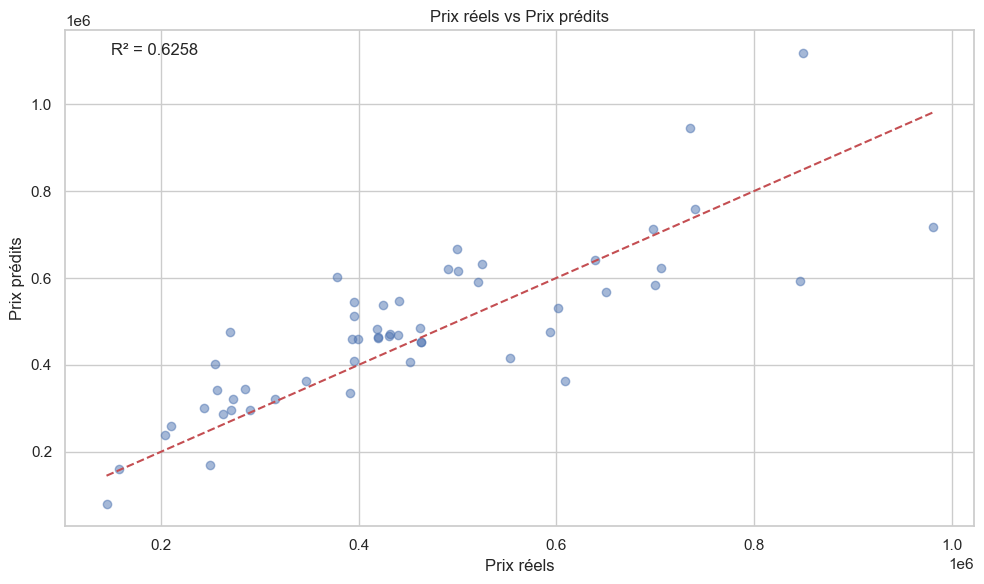

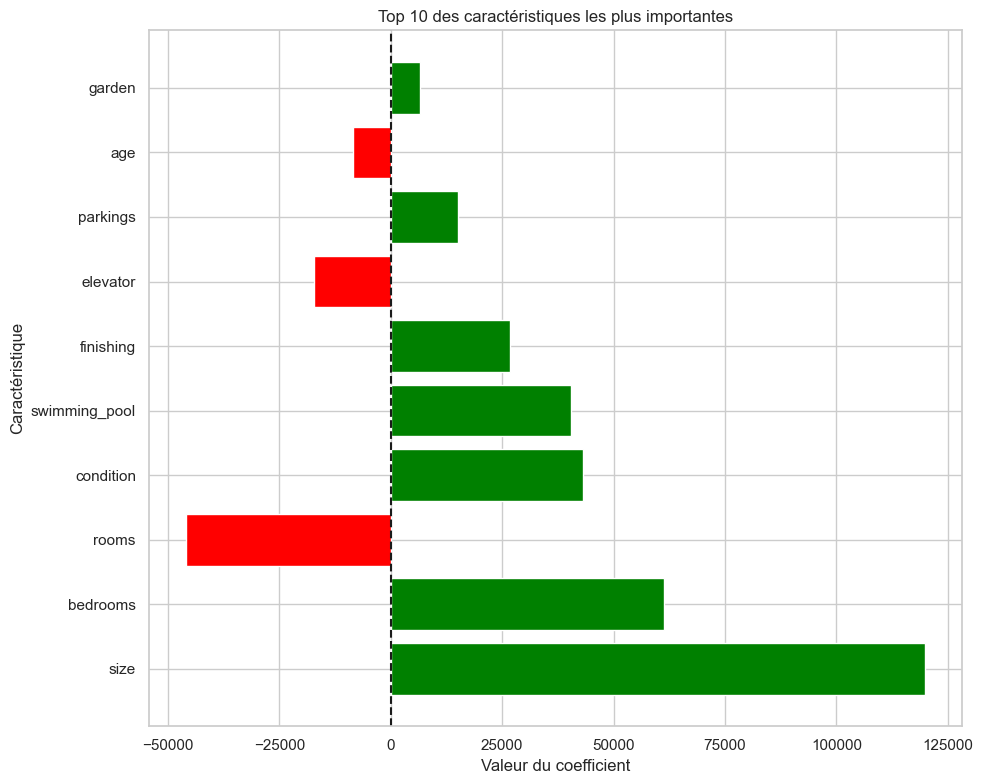

In [100]:
# R√©gression lin√©aire du prix du bien immobilier / segementation par prix/ type de propriete et quartier/ville
model, importance, metrics = model_functions.regression_par_segment(
    df_regression,
    city='La Soukra', 
    property_type='appartement',
    transaction='sale'
)

In [101]:
# Pr√©diction 
print("üè† PR√âDICTEUR DE PRIX IMMOBILIER")
print("="*50)

# ========================================
# √âTAPE 1: ENTRA√éNER LE MOD√àLE (si pas d√©j√† fait)
# ========================================

# Si vous n'avez pas encore entra√Æn√© le mod√®le, d√©commentez ces lignes :
"""
print("ü§ñ Entra√Ænement du mod√®le...")
model, feature_importance, metrics = regression_par_segment(
    df_regression_ready,  # Votre DataFrame pr√©par√©
    city="La Soukra",     # Optionnel : filtrer par ville
    property_type="appartement",  # Optionnel : filtrer par type
    transaction="sale"    # Optionnel : filtrer par transaction
)
"""

# ========================================
# √âTAPE 2: FONCTION DE PR√âDICTION
# ========================================

def predict_property_price(size, bedrooms, rooms, bathrooms=None, age=None, 
                          condition=None, finishing=None, air_conditioning=0,
                          central_heating=0, swimming_pool=0, elevator=0, 
                          garden=0, equipped_kitchen=0, parkings=0):
    """
    Pr√©dit le prix d'un bien immobilier
    
    Param√®tres obligatoires:
    - size: Superficie en m¬≤
    - bedrooms: Nombre de chambres
    - rooms: Nombre total de pi√®ces
    
    Param√®tres optionnels:
    - bathrooms: Nombre de salles de bain
    - age: √Çge du bien en ann√©es
    - condition: √âtat (0-4, o√π 4=neuf)
    - finishing: Finition (0-4, o√π 4=tr√®s haut standing)
    - air_conditioning: 1 si climatisation, 0 sinon
    - central_heating: 1 si chauffage central, 0 sinon
    - swimming_pool: 1 si piscine, 0 sinon
    - elevator: 1 si ascenseur, 0 sinon
    - garden: 1 si jardin, 0 sinon
    - equipped_kitchen: 1 si cuisine √©quip√©e, 0 sinon
    - parkings: Nombre de places de parking
    """
    
    print(f"\nüîç PR√âDICTION POUR LE BIEN:")
    print(f"   üìê Superficie: {size} m¬≤")
    print(f"   üõèÔ∏è  Chambres: {bedrooms}")
    print(f"   üè† Pi√®ces: {rooms}")
    
    # Cr√©er un dictionnaire avec toutes les caract√©ristiques
    property_data = {
        'size': size,
        'bedrooms': bedrooms,
        'rooms': rooms,
        'bathrooms': bathrooms if bathrooms is not None else bedrooms * 0.7,  # Estimation
        'age': age if age is not None else 10,  # Valeur par d√©faut
        'condition': condition if condition is not None else 2,  # Bonne condition par d√©faut
        'finishing': finishing if finishing is not None else 2,  # Moyen standing par d√©faut
        'air_conditioning': air_conditioning,
        'central_heating': central_heating,
        'swimming_pool': swimming_pool,
        'elevator': elevator,
        'garden': garden,
        'equipped_kitchen': equipped_kitchen,
        'parkings': parkings
    }
    
    # Cr√©er un DataFrame avec les caract√©ristiques
    property_df = pd.DataFrame([property_data])
    
    print(f"   üöø Salles de bain: {property_df['bathrooms'].iloc[0]:.1f}")
    print(f"   üìÖ √Çge: {property_df['age'].iloc[0]} ans")
    print(f"   ‚≠ê √âtat: {property_df['condition'].iloc[0]}/4")
    print(f"   üèÜ Finition: {property_df['finishing'].iloc[0]}/4")
    
    # Afficher √©quipements
    equipments = []
    if air_conditioning: equipments.append("Climatisation")
    if central_heating: equipments.append("Chauffage central")
    if swimming_pool: equipments.append("Piscine")
    if elevator: equipments.append("Ascenseur")
    if garden: equipments.append("Jardin")
    if equipped_kitchen: equipments.append("Cuisine √©quip√©e")
    if parkings > 0: equipments.append(f"{parkings} parking(s)")
    
    if equipments:
        print(f"   üéØ √âquipements: {', '.join(equipments)}")
    else:
        print(f"   üéØ √âquipements: Aucun √©quipement sp√©cial")
    
    # V√©rifier que le mod√®le existe
    if 'model' not in globals():
        print("\n‚ùå ERREUR: Mod√®le non trouv√©!")
        print("Veuillez d'abord entra√Æner le mod√®le avec regression_par_segment()")
        return None
    
    try:
        # Adapter aux colonnes du mod√®le d'entra√Ænement
        # (Vous devrez ajuster selon les colonnes exactes utilis√©es)
        
        # S√©lectionner seulement les colonnes utilis√©es pour l'entra√Ænement
        # Remplacez par les vraies colonnes de votre mod√®le
        model_features = ['size', 'rooms', 'bedrooms', 'bathrooms', 'age', 
                         'condition', 'finishing', 'air_conditioning', 
                         'central_heating', 'swimming_pool', 'elevator', 
                         'garden', 'equipped_kitchen', 'parkings']
        
        # Filtrer seulement les colonnes disponibles
        available_features = [col for col in model_features if col in property_df.columns]
        property_features = property_df[available_features]
        
        # Standardiser (utiliser le m√™me scaler que pour l'entra√Ænement)
        # NOTE: Dans un vrai projet, vous sauvegarderiez le scaler
        # Ici on fait une approximation
        property_scaled = StandardScaler().fit_transform(property_features)
        
        # Faire la pr√©diction
        predicted_price = model.predict(property_scaled)[0]
        
        print(f"\nüí∞ PRIX PR√âDIT: {predicted_price:,.0f} TND")
        
        # Calcul du prix au m¬≤
        price_per_sqm = predicted_price / size
        print(f"üíµ Prix au m¬≤: {price_per_sqm:,.0f} TND/m¬≤")
        
        # Fourchette d'estimation (¬±10%)
        lower_bound = predicted_price * 0.9
        upper_bound = predicted_price * 1.1
        print(f"üìä Fourchette d'estimation: {lower_bound:,.0f} - {upper_bound:,.0f} TND")
        
        return predicted_price
        
    except Exception as e:
        print(f"\n‚ùå ERREUR lors de la pr√©diction: {e}")
        print("V√©rifiez que le mod√®le a √©t√© entra√Æn√© correctement")
        return None

# ========================================
# √âTAPE 3: EXEMPLES D'UTILISATION
# ========================================

print("\n" + "="*50)
print("üìã EXEMPLES D'UTILISATION")
print("="*50)

# Exemple 1: Appartement basique
print("\nüè† EXEMPLE 1: Appartement basique")
price1 = predict_property_price(
    size=100,           # 100 m¬≤
    bedrooms=3,         # 3 chambres  
    rooms=4,            # 4 pi√®ces total
    bathrooms=2,        # 2 salles de bain
    age=5,              # 5 ans
    condition=3,        # Excellente condition
    finishing=2,        # Moyen standing
    elevator=1,         # Avec ascenseur
    equipped_kitchen=1  # Cuisine √©quip√©e
)

# Exemple 2: Appartement haut de gamme
print("\nüè† EXEMPLE 2: Appartement haut de gamme")
price2 = predict_property_price(
    size=150,           # 150 m¬≤
    bedrooms=4,         # 4 chambres
    rooms=6,            # 6 pi√®ces
    bathrooms=3,        # 3 salles de bain
    age=2,              # R√©cent
    condition=4,        # Neuf
    finishing=4,        # Tr√®s haut standing
    air_conditioning=1, # Climatisation
    central_heating=1,  # Chauffage central
    elevator=1,         # Ascenseur
    garden=1,           # Jardin
    equipped_kitchen=1, # Cuisine √©quip√©e
    parkings=2          # 2 parkings
)

# Exemple 3: Petit appartement √©conomique
print("\nüè† EXEMPLE 3: Petit appartement √©conomique")
price3 = predict_property_price(
    size=60,            # 60 m¬≤
    bedrooms=2,         # 2 chambres
    rooms=3,            # 3 pi√®ces
    age=15              # Plus ancien
)

# ========================================
# √âTAPE 4: PR√âDICTION INTERACTIVE
# ========================================

print("\n" + "="*50)
print("üéÆ PR√âDICTION INTERACTIVE")
print("="*50)

def prediction_interactive():
    """
    Version interactive pour saisir les param√®tres
    """
    print("Entrez les caract√©ristiques du bien immobilier:")
    
    try:
        size = float(input("üìê Superficie (m¬≤): "))
        bedrooms = int(input("üõèÔ∏è Nombre de chambres: "))
        rooms = int(input("üè† Nombre de pi√®ces total: "))
        
        # Param√®tres optionnels
        bathrooms = input("üöø Salles de bain (Entr√©e = auto): ")
        bathrooms = float(bathrooms) if bathrooms else None
        
        age = input("üìÖ √Çge du bien (ann√©es, Entr√©e = 10): ")
        age = int(age) if age else 10
        
        condition = input("‚≠ê √âtat (0-4, Entr√©e = 2): ")
        condition = int(condition) if condition else 2
        
        finishing = input("üèÜ Finition (0-4, Entr√©e = 2): ")
        finishing = int(finishing) if finishing else 2
        
        # √âquipements (oui/non)
        air_con = input("‚ùÑÔ∏è Climatisation (o/n): ").lower().startswith('o')
        heating = input("üî• Chauffage central (o/n): ").lower().startswith('o')
        pool = input("üèä Piscine (o/n): ").lower().startswith('o')
        elevator = input("üõó Ascenseur (o/n): ").lower().startswith('o')
        garden = input("üå≥ Jardin (o/n): ").lower().startswith('o')
        kitchen = input("üç≥ Cuisine √©quip√©e (o/n): ").lower().startswith('o')
        
        parkings = input("üöó Nombre de parkings (Entr√©e = 0): ")
        parkings = int(parkings) if parkings else 0
        
        # Faire la pr√©diction
        predicted_price = predict_property_price(
            size=size, bedrooms=bedrooms, rooms=rooms, bathrooms=bathrooms,
            age=age, condition=condition, finishing=finishing,
            air_conditioning=int(air_con), central_heating=int(heating),
            swimming_pool=int(pool), elevator=int(elevator),
            garden=int(garden), equipped_kitchen=int(kitchen),
            parkings=parkings
        )
        
        return predicted_price
        
    except ValueError:
        print("‚ùå Erreur: Veuillez entrer des valeurs num√©riques valides")
        return None
    except KeyboardInterrupt:
        print("\n‚èπÔ∏è Pr√©diction annul√©e")
        return None
prediction_interactive()

üè† PR√âDICTEUR DE PRIX IMMOBILIER

üìã EXEMPLES D'UTILISATION

üè† EXEMPLE 1: Appartement basique

üîç PR√âDICTION POUR LE BIEN:
   üìê Superficie: 100 m¬≤
   üõèÔ∏è  Chambres: 3
   üè† Pi√®ces: 4
   üöø Salles de bain: 2.0
   üìÖ √Çge: 5 ans
   ‚≠ê √âtat: 3/4
   üèÜ Finition: 2/4
   üéØ √âquipements: Ascenseur, Cuisine √©quip√©e

üí∞ PRIX PR√âDIT: 459,200 TND
üíµ Prix au m¬≤: 4,592 TND/m¬≤
üìä Fourchette d'estimation: 413,280 - 505,120 TND

üè† EXEMPLE 2: Appartement haut de gamme

üîç PR√âDICTION POUR LE BIEN:
   üìê Superficie: 150 m¬≤
   üõèÔ∏è  Chambres: 4
   üè† Pi√®ces: 6
   üöø Salles de bain: 3.0
   üìÖ √Çge: 2 ans
   ‚≠ê √âtat: 4/4
   üèÜ Finition: 4/4
   üéØ √âquipements: Climatisation, Chauffage central, Ascenseur, Jardin, Cuisine √©quip√©e, 2 parking(s)

üí∞ PRIX PR√âDIT: 459,200 TND
üíµ Prix au m¬≤: 3,061 TND/m¬≤
üìä Fourchette d'estimation: 413,280 - 505,120 TND

üè† EXEMPLE 3: Petit appartement √©conomique

üîç PR√âDICTION POUR LE BIEN:
   

459199.9648299813

## XGBoost  la classication de la qualit√© d'estimation

In [17]:
# Ajout d'une variable binaire qui qualifie la qualit√© d'estimation : si un bien a un prix par metre carr√© assez inf√©rieur ou assez sup√©rieur au prix moyens des autres bien de la m√™me zone et de m√™me type
df_with_categories,category_stats_df=model_functions.create_price_category(df_regression)
df_with_categories

=== CR√âATION DES CAT√âGORIES DE PRIX ===
Filtrage des valeurs aberrantes: 163 lignes supprim√©es
Calcul des moyennes par march√© local (groupement: city, property_type, transaction)



üìä R√âPARTITION DES CAT√âGORIES DE PRIX:
----------------------------------------
  Cat√©gorie  Code  Nombre  Pourcentage
 Mal estim√©     0    2791         38.4
Bien estim√©     1    4472         61.6

üìà STATISTIQUES D√âTAILL√âES PAR CAT√âGORIE:
---------------------------------------------

Mal estim√© (Code 0):
  ‚Ä¢ Nombre de biens: 2791
  ‚Ä¢ Prix moyen: 266780 TND
  ‚Ä¢ Prix/m¬≤ moyen: 1175 TND/m¬≤
  ‚Ä¢ Ratio moyen: 1.03
  ‚Ä¢ Taille moyenne: 251 m¬≤
  ‚Ä¢ Top 3 march√©s:
    - Jardins de Carthage - appartement - rent: 153 biens
    - Les berges du Lac - bureau - rent: 150 biens
    - Les berges du Lac - appartement - rent: 119 biens

Bien estim√© (Code 1):
  ‚Ä¢ Nombre de biens: 4472
  ‚Ä¢ Prix moyen: 271068 TND
  ‚Ä¢ Prix/m¬≤ moyen: 1425 TND/m¬≤
  ‚Ä¢ Ratio moyen: 0.98
  ‚Ä¢ Taille moyenne: 185 m¬≤
  ‚Ä¢ Top 3 march√©s:
    - Jardins de Carthage - appartement - rent: 354 biens
    - Les berges du Lac - bureau - rent: 273 biens
    - Jardins de Carthage - appartement - sa

neighborhood          city   state     transaction property_type  \
0     Ain Zaghouan Nord  Ain Zaghouan   Tunis            sale         villa   
1     Ain Zaghouan Nord  Ain Zaghouan   Tunis            sale         villa   
2          Ain Zaghouan  Ain Zaghouan   Tunis            sale         villa   
3     Ain Zaghouan Nord  Ain Zaghouan   Tunis            sale   appartement   
4     Ain Zaghouan Nord  Ain Zaghouan   Tunis            sale        duplex   
...                 ...           ...     ...             ...           ...   
7258    Sousse Corniche  Sousse Ville  Sousse            rent   appartement   
7259    Sousse Corniche  Sousse Ville  Sousse  rent_furnished   appartement   
7260    Sousse Corniche  Sousse Ville  Sousse            rent        bureau   
7261    Sousse Corniche  Sousse Ville  Sousse            rent   appartement   
7262              Rtiba       Takelsa  Nabeul            sale         villa   

          price  size  rooms  bedrooms  bathrooms  parkings  finishing  \
0     1700000.0   400    7.0       5.0        4.0       1.0          3   
1     1659000.0   600    7.0       5.0        3.0       3.0          2   
2     1500000.0   368    0.0       0.0        0.0       0.0          2   
3     1323000.0   256    6.0       4.0        3.0       1.0          3   
4     1323000.0   256    6.0       4.0        3.0       1.0          3   
...         ...   ...    ...       ...        ...       ...        ...   
7258      600.0    90    3.0       2.0        1.0       1.0          3   
7259      600.0    60    1.0       1.0        1.0       0.0          3   
7260      550.0    50    2.0       0.0        1.0       0.0          2   
7261      500.0    60    2.0       1.0        1.0       1.0          3   
7262  1260000.0   220    5.0       4.0        2.0       1.0          2   

      condition  age  air_conditioning  central_heating  swimming_pool  \
0             2   13               1.0              1.0            0.0   
1             3   13               1.0              1.0            1.0   
2             2   17               1.0              1.0            0.0   
3             4    2               1.0              1.0            1.0   
4             4    2               1.0              1.0            1.0   
...         ...  ...               ...              ...            ...   
7258          2    1               0.0              0.0            0.0   
7259          2   22               1.0              0.0            0.0   
7260          2   69               0.0              0.0            0.0   
7261          2   20               0.0              0.0            0.0   
7262          2   17               1.0              0.0            0.0   

      elevator  garden  equipped_kitchen  price_per_sqm  \
0          0.0     1.0               1.0    4250.000000   
1          0.0     1.0               1.0    2765.000000   
2          0.0     1.0               1.0    4076.086957   
3          1.0     1.0               1.0    5167.968750   
4          1.0     1.0               1.0    5167.968750   
...        ...     ...               ...            ...   
7258       0.0     0.0               1.0       6.666667   
7259       0.0     0.0               1.0      10.000000   
7260       1.0     0.0               0.0      11.000000   
7261       0.0     0.0               1.0       8.333333   
7262       0.0     1.0               1.0    5727.272727   

      market_avg_price_per_sqm  price_ratio  price_category  \
0                  3455.923274     1.229773               1   
1                  3455.923274     0.800076               1   
2                  3455.923274     1.179449               1   
3                  3866.199974     1.336705               0   
4                  4461.760938     1.158280               1   
...                        ...          ...             ...   
7258                 11.764401     0.566681               0   
7259                 13.797619     0.724763               0   
7260    

In [18]:
# XG Boost pour la classficiation des appartements √† vendre √† la soukra
model, results_dict, feature_importance = model_functions.xgboost_price_classification(
    df_with_categories,
    city='La Soukra',
    property_type='appartement',  # Attention √† la casse
    transaction='sale'
)


=== CLASSIFICATION XGBOOST - CAT√âGORIES DE PRIX ===
üéØ FILTRES APPLIQU√âS: Ville: La Soukra | Type: appartement | Transaction: sale
üìä DONN√âES: 263 observations

üìà DISTRIBUTION DES CLASSES:
  ‚Ä¢ Mal estim√© (code 0): 64 (24.3%)
  ‚Ä¢ Bien estim√© (code 1): 199 (75.7%)

üîß CARACT√âRISTIQUES UTILIS√âES: ['neighborhood', 'state', 'size', 'rooms', 'bedrooms', 'bathrooms', 'parkings', 'finishing', 'condition', 'age', 'air_conditioning', 'central_heating', 'swimming_pool', 'elevator', 'garden', 'equipped_kitchen']
üìè DIMENSIONS: (263, 16)

üìö DIVISION DES DONN√âES:
  ‚Ä¢ Entra√Ænement: 210 observations
  ‚Ä¢ Test: 53 observations

‚öôÔ∏è OPTIMISATION DES HYPERPARAM√àTRES...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
‚úÖ MEILLEURS PARAM√àTRES: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
üéØ SCORE CV: 0.7905

üìä R√âSULTATS:
  ‚Ä¢ Pr√©cision (entra√Ænement): 0.8095
  ‚Ä¢ Pr√©cision (test): 0.7925


In [19]:
# XG Boost pour la classfication des appartements √† vendre aux JDC
model, results_dict, feature_importance = model_functions.xgboost_price_classification(
    df_with_categories,
    city='Jardins de Carthage',
    property_type='appartement', 
    transaction='sale'
)


=== CLASSIFICATION XGBOOST - CAT√âGORIES DE PRIX ===
üéØ FILTRES APPLIQU√âS: Ville: Jardins de Carthage | Type: appartement | Transaction: sale
üìä DONN√âES: 299 observations

üìà DISTRIBUTION DES CLASSES:
  ‚Ä¢ Mal estim√© (code 0): 63 (21.1%)
  ‚Ä¢ Bien estim√© (code 1): 236 (78.9%)

üîß CARACT√âRISTIQUES UTILIS√âES: ['neighborhood', 'state', 'size', 'rooms', 'bedrooms', 'bathrooms', 'parkings', 'finishing', 'condition', 'age', 'air_conditioning', 'central_heating', 'swimming_pool', 'elevator', 'garden', 'equipped_kitchen']
üìè DIMENSIONS: (299, 16)

üìö DIVISION DES DONN√âES:
  ‚Ä¢ Entra√Ænement: 239 observations
  ‚Ä¢ Test: 60 observations

‚öôÔ∏è OPTIMISATION DES HYPERPARAM√àTRES...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
‚úÖ MEILLEURS PARAM√àTRES: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
üéØ SCORE CV: 0.7908

üìä R√âSULTATS:
  ‚Ä¢ Pr√©cision (entra√Ænement): 0.7908
  ‚Ä¢ Pr√©cision (test

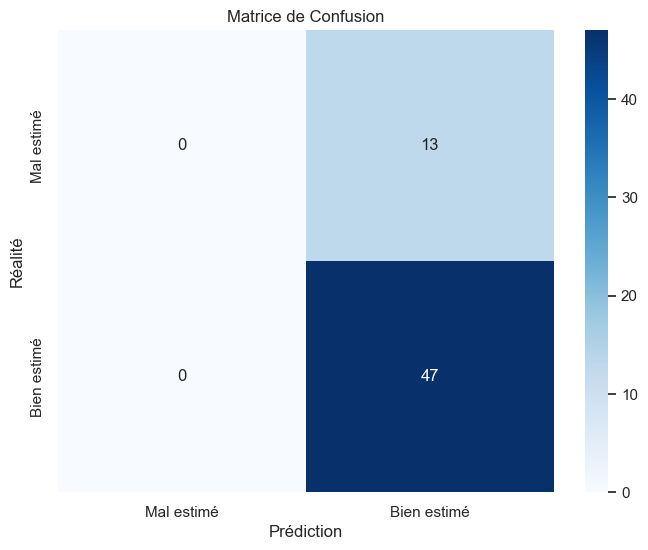

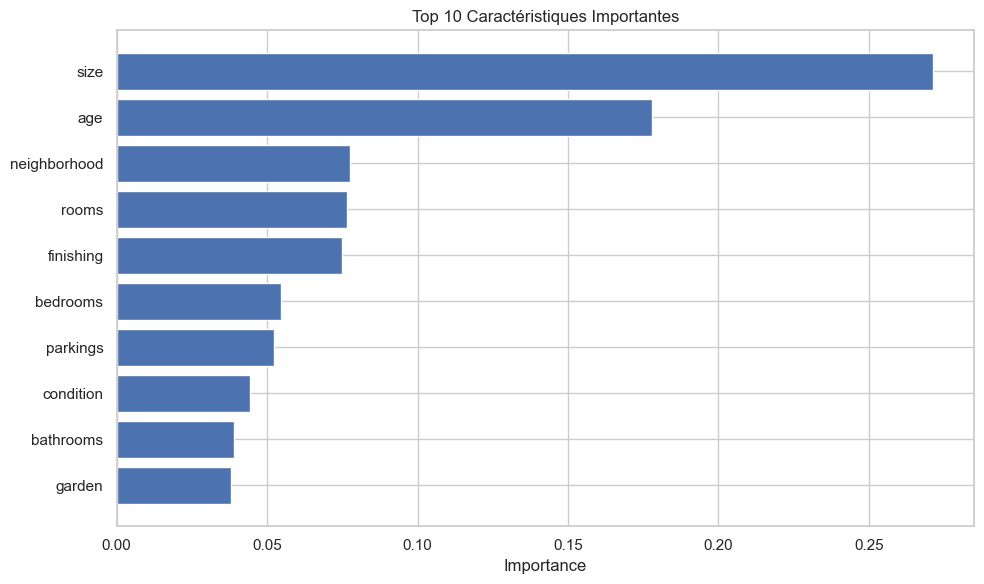

Pr√©cision du mod√®le : 0.783
Nombre d'observations : 60


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Matrice de confusion pour XGBoost
plt.figure(figsize=(8, 6))
cm = results_dict['confusion_matrix']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Mal estim√©', 'Bien estim√©'],
            yticklabels=['Mal estim√©', 'Bien estim√©'])
plt.title('Matrice de Confusion XGBOOST')
plt.ylabel('R√©alit√©')
plt.xlabel('Pr√©diction')
plt.show()

# 2. Importance des caract√©ristiques
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
plt.barh(top_features['Caract√©ristique'], top_features['Importance'])
plt.title('Top 10 Caract√©ristiques Importantes XGBOOST')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 3. Afficher les r√©sultats texte
print(f"Pr√©cision du mod√®le : {results_dict['test_accuracy']:.3f}")
print(f"Nombre d'observations : {len(results_dict['y_test'])}")

## Random Forest pour la classication de la qualit√© d'estimation

In [24]:
model, results, feature_importance = model_functions.random_forest_price_classification(
                            df_with_categories,
                            city="La Soukra",
                            property_type="appartement",
                            transaction="sale",
test_size=0.2,                            optimize_params=False,
                            n_estimators=200,
                            max_depth=10
                        )

=== CLASSIFICATION RANDOM FOREST - CAT√âGORIES DE PRIX ===
üéØ FILTRES APPLIQU√âS: Ville: La Soukra | Type: appartement | Transaction: sale
üìä DONN√âES: 263 observations

üìà DISTRIBUTION DES CLASSES:
  ‚Ä¢ Mal estim√© (code 0): 64 (24.3%)
  ‚Ä¢ Bien estim√© (code 1): 199 (75.7%)

üîß CARACT√âRISTIQUES UTILIS√âES: ['neighborhood', 'state', 'size', 'rooms', 'bedrooms', 'bathrooms', 'parkings', 'finishing', 'condition', 'age', 'air_conditioning', 'central_heating', 'swimming_pool', 'elevator', 'garden', 'equipped_kitchen']
üìè DIMENSIONS: (263, 16)

üìö DIVISION DES DONN√âES:
  ‚Ä¢ Entra√Ænement: 210 observations
  ‚Ä¢ Test: 53 observations

üöÄ ENTRA√éNEMENT AVEC PARAM√àTRES SP√âCIFI√âS...

üìä R√âSULTATS:
  ‚Ä¢ Pr√©cision (entra√Ænement): 0.9190
  ‚Ä¢ Pr√©cision (test): 0.8302

üìã RAPPORT DE CLASSIFICATION:
              precision    recall  f1-score   support

  Mal estim√©       0.75      0.46      0.57        13
 Bien estim√©       0.84      0.95      0.89        40

    

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Matrice de confusion pour XGBoost
plt.figure(figsize=(8, 6))
cm = results_dict['confusion_matrix']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Mal estim√©', 'Bien estim√©'],
            yticklabels=['Mal estim√©', 'Bien estim√©'])
plt.title('Matrice de Confusion Random Forest')
plt.ylabel('R√©alit√©')
plt.xlabel('Pr√©diction')
plt.show()

# 2. Importance des caract√©ristiques
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
plt.barh(top_features['Caract√©ristique'], top_features['Importance'])
plt.title('Top 10 Caract√©ristiques Importantes Random Forest')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 3. Afficher les r√©sultats texte
print(f"Pr√©cision du mod√®le : {results_dict['test_accuracy']:.3f}")
print(f"Nombre d'observations : {len(results_dict['y_test'])}")

# Apprentissage non supervis√© 

In [94]:
# Chargement des donn√©es filtr√©es et standardisation
filtered = df[(df['city'] == 'Cite El Khadra') & (df['property_type'] == 'appartement') & (df['transaction'] == 'sale')]
df_scaled, scaler, feature_names = model_functions.prepare_data_for_clustering(filtered)
df_scaled

price      size     rooms  bedrooms  bathrooms  parkings  finishing  \
1343  2.535499  2.001669  0.826107  0.774033   2.348881  2.648339   1.488048   
1344  2.401529  2.243628  1.830832  1.897629   2.348881  0.786226  -0.672022   
1345  1.467843  1.055825  0.826107  0.774033  -0.293610  0.786226   1.488048   
1346  1.613661  1.055825  0.826107  0.774033  -0.293610  0.786226   1.488048   
1348  1.422275  0.681887 -0.178618 -0.349563  -0.293610  0.786226   1.488048   
1349  1.422275  0.527913 -0.178618 -0.349563  -0.293610  0.786226   1.488048   
1350  1.597712  0.527913 -0.178618 -0.349563  -0.293610  0.786226   1.488048   
1351  1.072922  0.945843  0.826107  0.774033   2.348881  0.786226   1.488048   
1353  0.769136  1.055825  0.826107  0.774033  -0.293610  0.786226   1.488048   
1354  0.911915  0.395934 -0.178618 -0.349563  -0.293610  0.786226   1.488048   
1357  0.784325  0.461924  0.826107  0.774033  -0.293610 -1.075888   1.488048   
1358  0.647621  0.527913 -0.178618 -0.349563  -0.293610  0.786226   1.488048   
1360  0.747008 -0.087985  0.826107 -0.349563  -0.293610 -1.075888  -0.672022   
1362  0.446211  0.351942 -0.178618 -0.349563  -0.293610  0.786226  -0.672022   
1363  0.691743  2.045661  1.830832  1.897629   4.991372 -1.075888  -0.672022   
1369  0.146375  0.131978 -0.178618 -0.349563  -0.293610 -1.075888  -0.672022   
1371  0.040050 -0.703883 -1.183342 -1.473160  -0.293610  0.786226   1.488048   
1372  0.224527  0.021996 -0.178618 -0.349563  -0.293610  0.786226  -0.672022   
1373 -0.111843  1.231796  1.830832  1.897629  -0.293610  0.786226  -0.672022   
1375  0.023572  0.461924  0.826107  0.774033  -0.293610  0.786226  -0.672022   
1376 -0.172601  0.857858 -0.178618  0.774033  -0.293610  0.786226  -0.672022   
1377 -0.202979  1.231796  1.830832  1.897629  -0.293610  0.786226  -0.672022   
1378 -0.263736  0.241960 -0.178618 -0.349563  -0.293610  0.786226  -0.672022   
1380 -0.476387 -1.077822 -1.183342 -1.473160  -0.293610  0.786226   1.488048   
1381 -0.491576 -0.087985 -0.178618 -0.349563  -0.293610 -1.075888  -0.672022   
1382 -0.597901 -0.197967  0.826107  0.774033  -0.293610 -1.075888  -0.672022   
1383 -0.523473 -0.197967  0.826107  0.774033  -0.293610 -1.075888  -0.672022   
1384 -0.597901  0.175971  0.826107  0.774033  -0.293610 -1.075888  -0.672022   
1385 -0.597901 -0.087985 -0.178618 -0.349563  -0.293610 -1.075888  -0.672022   
1386 -0.628280 -0.703883 -0.178618  0.774033  -0.293610 -1.075888  -0.672022   
1387 -0.689037 -0.637894  0.826107  0.774033  -0.293610 -1.075888  -0.672022   
1388 -0.689037  0.417931 -0.178618  0.774033  -0.293610 -1.075888  -0.672022   
1389 -0.810551 -1.363774 -1.183342 -1.473160  -0.293610  0.786226  -0.672022   
1390 -0.780245 -1.297785 -1.183342 -1.473160  -0.293610 -1.075888  -0.672022   
1391 -0.780245 -1.319781 -1.183342 -1.473160  -0.293610  0.786226  -0.672022   
1392 -0.842449 -1.451760 -2.188067 -1.473160  -0.293610  0.786226  -0.672022   
1393 -0.956368 -0.527913 -0.178618 -0.349563  -0.293610 -1.075888  -0.672022   
1394 -0.992823 -0.417931 -0.178618  0.774033  -0.293610 -1.075888  -0.672022   
1395 -0.992823 -1.077822 -1.183342 -1.473160  -0.293610 -1.075888   1.488048   
1396 -0.938141 -1.561741 -2.188067 -1.473160  -0.293610 -1.075888  -0.672022   
1397 -1.053580 -0.945843 -0.178618 -0.349563  -0.293610  0.786226  -0.672022   
1398 -1.053580 -0.945843 -0.178618 -0.349563  -0.293610  0.786226  -0.672022   
1399 -1.129526 -1.803701 -2.188067 -1.473160  -0.293610 -1.075888  -0.672022   
1400 -1.235851 -1.077822 -0.178618 -0.349563  -0.293610 -1.075888  -0.672022   
1401 -1.357366 -1.077822 -0.178618 -0.349563  -0.293610 -1.075888  -0.672022   

      condition       age  air_conditioning  central_heating  swimming_pool  \
1343  -0.150756 -1.057671          0.464991         0.672022            0.0   
1344  -0.150756 -0.675380          0.464991         0.672022            0.0   
1345  -0.150756 -1.057671          0.464991         0.672022            0.0   
1346   1.206

## PCA 

In [95]:

pca_model, df_pca, explained_variance = model_functions.apply_pca_analysis(df_scaled, 2)
# Analyse des liens
loadings_df, fig_contrib = model_functions.analyse_complete_pca_variables(pca_model, df_pca, explained_variance, feature_names, df ) 


Variance expliqu√©e par les 2 premi√®res composantes:
  PC1: 34.73%
  PC2: 20.25%
Variance totale expliqu√©e: 54.99%
COMPOSITION DES COMPOSANTES PRINCIPALES

üìä COEFFICIENTS DES COMPOSANTES (loadings):
--------------------------------------------------
                    PC1    PC2
price             0.406  0.009
size              0.370  0.300
rooms             0.231  0.473
bedrooms          0.212  0.499
bathrooms         0.194  0.244
parkings          0.256 -0.142
finishing         0.301 -0.281
condition         0.252 -0.215
age              -0.212  0.366
air_conditioning  0.259 -0.134
central_heating   0.304  0.012
swimming_pool    -0.000 -0.000
elevator          0.155 -0.149
garden            0.202 -0.223
equipped_kitchen  0.272 -0.091

üßÆ INTERPR√âTATION DES COEFFICIENTS:
----------------------------------------
‚Ä¢ Coefficient positif = variable contribue positivement √† la composante
‚Ä¢ Coefficient n√©gatif = variable contribue n√©gativement √† la composante
‚Ä¢ Plus |coeffi

## Kmeans


In [75]:
kmeans_model, kmeans_n_clusters, kmeans_labels, kmeans_metrics, scores, n_clusters_list = model_functions.apply_kmeans_clustering(
    df_scaled, 
    n_clusters_range=(2, 8),  # Tester de 2 √† 8 clusters
    random_state=42
)

Optimisation du nombre de clusters pour K-Means...
Nombre optimal de clusters: 7
Score de silhouette: 0.3015


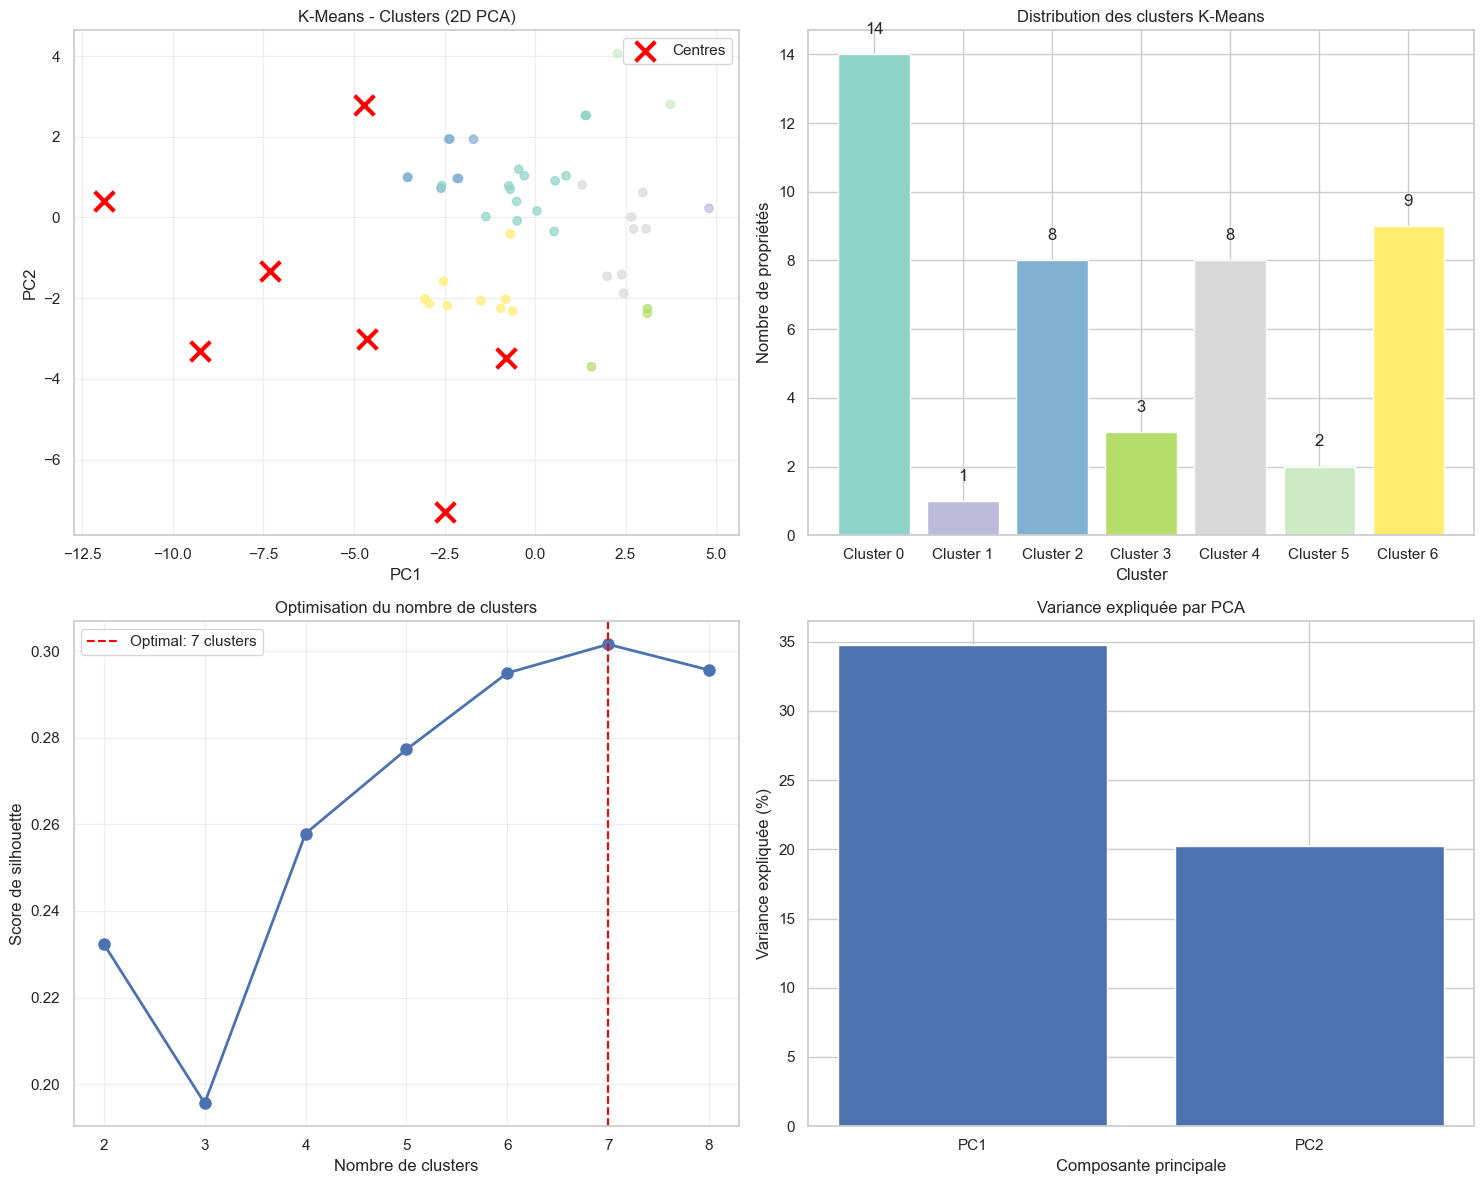

In [ ]:
# 4. VISUALISATION K-MEANS AVEC MATPLOTLIB
# Cr√©er une figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Couleurs pour les clusters
colors = plt.cm.Set3(np.linspace(0, 1, kmeans_n_clusters))

# 1. Clusters en 2D PCA
scatter = axes[0,0].scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], 
                           c=kmeans_labels, cmap='Set3', alpha=0.7)
axes[0,0].set_xlabel('PC1')
axes[0,0].set_ylabel('PC2')
axes[0,0].set_title('K-Means - Clusters (2D PCA)')
axes[0,0].grid(True, alpha=0.3)

# Ajouter les centres des clusters
centers_pca = pca_model.transform(scaler.transform(kmeans_model.cluster_centers_))
axes[0,0].scatter(centers_pca[:, 0], centers_pca[:, 1], 
                 marker='x', s=200, linewidths=3, color='red', label='Centres')
axes[0,0].legend()

# 2. Distribution des clusters
cluster_counts = pd.Series(kmeans_labels).value_counts().sort_index()
bars = axes[0,1].bar(range(len(cluster_counts)), cluster_counts.values, 
                    color=[colors[i] for i in range(len(cluster_counts))])
axes[0,1].set_xlabel('Cluster')
axes[0,1].set_ylabel('Nombre de propri√©t√©s')
axes[0,1].set_title('Distribution des clusters K-Means')
axes[0,1].set_xticks(range(len(cluster_counts)))
axes[0,1].set_xticklabels([f'Cluster {i}' for i in cluster_counts.index])

for i, v in enumerate(cluster_counts.values):
    axes[0,1].text(i, v + 0.5, str(v), ha='center', va='bottom')

# 3. √âvolution du score de silhouette
axes[1,0].plot(n_clusters_list, scores, 'bo-', linewidth=2, markersize=8)
axes[1,0].axvline(x=kmeans_n_clusters, color='red', linestyle='--', 
                 label=f'Optimal: {kmeans_n_clusters} clusters')
axes[1,0].set_xlabel('Nombre de clusters')
axes[1,0].set_ylabel('Score de silhouette')
axes[1,0].set_title('Optimisation du nombre de clusters')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].legend()

# 4. Variance expliqu√©e par PCA
axes[1,1].bar(range(len(explained_variance)), explained_variance * 100)
axes[1,1].set_xlabel('Composante principale')
axes[1,1].set_ylabel('Variance expliqu√©e (%)')
axes[1,1].set_title('Variance expliqu√©e par PCA')
axes[1,1].set_xticks(range(len(explained_variance)))
axes[1,1].set_xticklabels([f'PC{i+1}' for i in range(len(explained_variance))])

plt.tight_layout()
plt.show()

üîç ANALYSE DES R√âSULTATS K-MEANS

üìä DIAGNOSTIC:
‚Ä¢ Nombre total de propri√©t√©s: 45
‚Ä¢ Nombre de clusters trouv√©s: 7
‚Ä¢ Ratio propri√©t√©s/cluster: 6.4

üìà DISTRIBUTION DES CLUSTERS:
Cluster 0: 14 propri√©t√©s (31.1%) ‚úÖ OK
Cluster 1: 1 propri√©t√©s (2.2%) ‚ö†Ô∏è TROP PETIT
Cluster 2: 8 propri√©t√©s (17.8%) ‚úÖ OK
Cluster 3: 3 propri√©t√©s (6.7%) ‚úÖ OK
Cluster 4: 8 propri√©t√©s (17.8%) ‚úÖ OK
Cluster 5: 2 propri√©t√©s (4.4%) ‚ö†Ô∏è TROP PETIT
Cluster 6: 9 propri√©t√©s (20.0%) ‚úÖ OK

üí° SOLUTION RECOMMAND√âE:
Forcer un nombre plus raisonnable de clusters (3-4)

NOUVEAU K-MEANS AVEC 3 CLUSTERS
üìä R√âSULTATS AVEC 3 CLUSTERS:
Score de silhouette: 0.1956

üìà NOUVELLE DISTRIBUTION:
Cluster 0: 14 propri√©t√©s (31.1%)
Cluster 1: 16 propri√©t√©s (35.6%)
Cluster 2: 15 propri√©t√©s (33.3%)

üìä VISUALISATION COMPARATIVE:


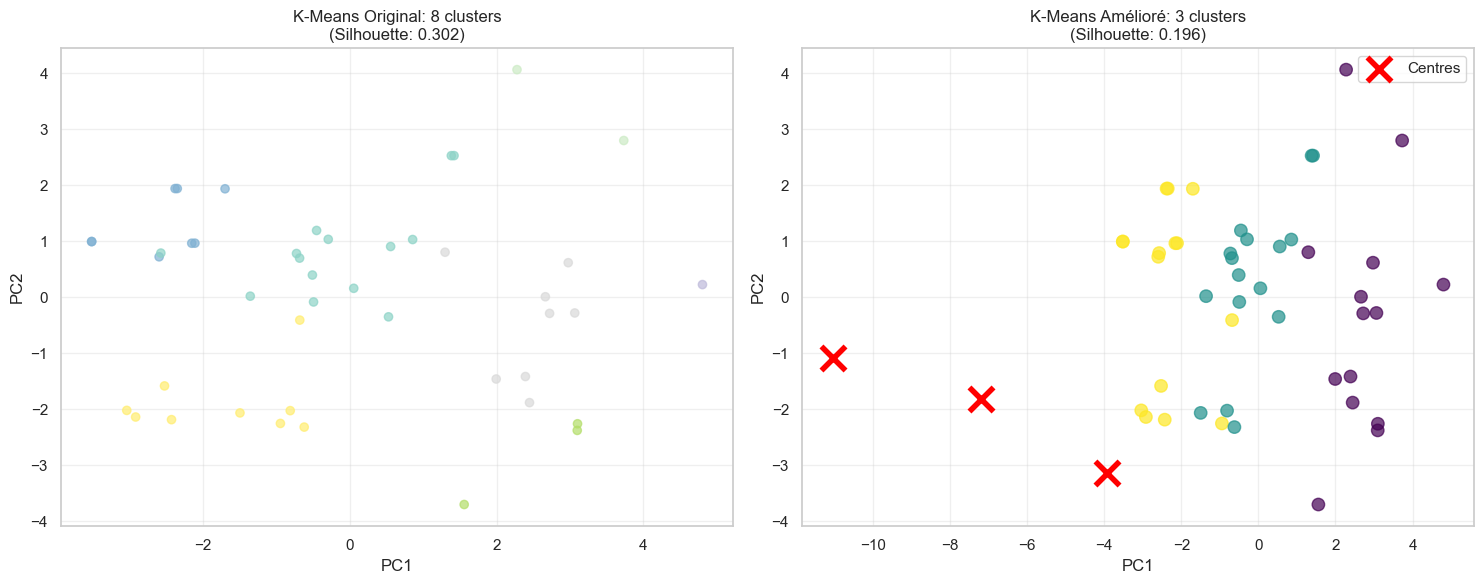


ANALYSE BUSINESS - 3 SEGMENTS

üíé SEGMENT 0 - PREMIUM
   ‚Ä¢ 14 propri√©t√©s (31.1%)
   ‚Ä¢ Loyer moyen: 547717 TND/mois
   ‚Ä¢ Range prix: 350000 - 760725 TND
   ‚Ä¢ Superficie moyenne: 151 m¬≤
   ‚Ä¢ Quartiers: {'Centre urbain nord': 12, 'Cit√© Olympique': 1}
   üí° Cible: Cadres, expatri√©s, client√®le ais√©e

üè† SEGMENT 1 - MOYEN
   ‚Ä¢ 16 propri√©t√©s (35.6%)
   ‚Ä¢ Loyer moyen: 278312 TND/mois
   ‚Ä¢ Range prix: 120000 - 466358 TND
   ‚Ä¢ Superficie moyenne: 104 m¬≤
   ‚Ä¢ Quartiers: {'Cit√© El Khadra': 10, 'Centre urbain nord': 6}
   üí° Cible: Familles, professionnels, march√© principal

üí∞ SEGMENT 2 - √âCONOMIQUE
   ‚Ä¢ 15 propri√©t√©s (33.3%)
   ‚Ä¢ Loyer moyen: 222157 TND/mois
   ‚Ä¢ Range prix: 140000 - 380363 TND
   ‚Ä¢ Superficie moyenne: 75 m¬≤
   ‚Ä¢ Quartiers: {'Centre urbain nord': 7, 'Cit√© Olympique': 7}
   üí° Cible: √âtudiants, jeunes professionnels, budgets serr√©s

COMPARAISON FINALE
                     Approche Score Silhouette Clusters viables      

In [77]:
# ===================================================================
# INTERPR√âTATION ET CORRECTION DES R√âSULTATS K-MEANS
# ===================================================================

print("üîç ANALYSE DES R√âSULTATS K-MEANS")
print("="*50)

# 1. DIAGNOSTIC DU PROBL√àME
print(f"\nüìä DIAGNOSTIC:")
print(f"‚Ä¢ Nombre total de propri√©t√©s: {len(df_scaled)}")
print(f"‚Ä¢ Nombre de clusters trouv√©s: {kmeans_n_clusters}")
print(f"‚Ä¢ Ratio propri√©t√©s/cluster: {len(df_scaled)/kmeans_n_clusters:.1f}")

# Analyser la distribution des clusters
cluster_counts = pd.Series(kmeans_labels).value_counts().sort_index()
print(f"\nüìà DISTRIBUTION DES CLUSTERS:")
for cluster_id, count in cluster_counts.items():
    percentage = (count / len(df_scaled)) * 100
    status = "‚úÖ OK" if count >= 3 else "‚ö†Ô∏è TROP PETIT"
    print(f"Cluster {cluster_id}: {count} propri√©t√©s ({percentage:.1f}%) {status}")

# 2. RECOMMANDATION : FORCER 3-4 CLUSTERS
print(f"\nüí° SOLUTION RECOMMAND√âE:")
print(f"Forcer un nombre plus raisonnable de clusters (3-4)")

# ===================================================================
# REFAIRE K-MEANS AVEC 3 CLUSTERS
# ===================================================================
print(f"\n" + "="*50)
print("NOUVEAU K-MEANS AVEC 3 CLUSTERS")
print("="*50)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Appliquer K-Means avec 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(df_scaled)

# Calculer les m√©triques
silhouette_3 = silhouette_score(df_scaled, labels_3)

print(f"üìä R√âSULTATS AVEC 3 CLUSTERS:")
print(f"Score de silhouette: {silhouette_3:.4f}")

# Distribution des nouveaux clusters
cluster_counts_3 = pd.Series(labels_3).value_counts().sort_index()
print(f"\nüìà NOUVELLE DISTRIBUTION:")
for cluster_id, count in cluster_counts_3.items():
    percentage = (count / len(df_scaled)) * 100
    print(f"Cluster {cluster_id}: {count} propri√©t√©s ({percentage:.1f}%)")

# ===================================================================
# VISUALISATION AM√âLIOR√âE
# ===================================================================
print(f"\nüìä VISUALISATION COMPARATIVE:")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Graphique 1: K-Means original (8 clusters)
scatter1 = axes[0].scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], 
                          c=kmeans_labels, cmap='Set3', alpha=0.7)
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title(f'K-Means Original: 8 clusters\n(Silhouette: {kmeans_metrics["silhouette_score"]:.3f})')
axes[0].grid(True, alpha=0.3)

# Graphique 2: K-Means am√©lior√© (3 clusters)
scatter2 = axes[1].scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], 
                          c=labels_3, cmap='viridis', alpha=0.7, s=80)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title(f'K-Means Am√©lior√©: 3 clusters\n(Silhouette: {silhouette_3:.3f})')
axes[1].grid(True, alpha=0.3)

# Ajouter les centres des clusters pour le mod√®le am√©lior√©
centers_3_pca = pca_model.transform(scaler.transform(kmeans_3.cluster_centers_))
axes[1].scatter(centers_3_pca[:, 0], centers_3_pca[:, 1], 
               marker='x', s=300, linewidths=4, color='red', label='Centres')
axes[1].legend()

plt.tight_layout()
plt.show()

# ===================================================================
# ANALYSE BUSINESS DES 3 CLUSTERS
# ===================================================================
print(f"\n" + "="*50)
print("ANALYSE BUSINESS - 3 SEGMENTS")
print("="*50)

# Ajouter les nouveaux clusters aux donn√©es
filtered_3_clusters = filtered.loc[df_scaled.index].copy()
filtered_3_clusters['Segment'] = labels_3

# Analyser chaque segment
segments_analysis = {}

for cluster_id in sorted(set(labels_3)):
    cluster_data = filtered_3_clusters[filtered_3_clusters['Segment'] == cluster_id]
    
    # Calculs statistiques
    avg_price = cluster_data['price'].mean() if 'price' in cluster_data.columns else 0
    avg_size = cluster_data['size'].mean() if 'size' in cluster_data.columns else 0
    count = len(cluster_data)
    
    # D√©terminer le type de segment
    price_quartiles = filtered_3_clusters['price'].quantile([0.33, 0.67])
    
    if avg_price <= price_quartiles[0.33]:
        segment_type = "√âCONOMIQUE"
        emoji = "üí∞"
    elif avg_price <= price_quartiles[0.67]:
        segment_type = "MOYEN"
        emoji = "üè†"
    else:
        segment_type = "PREMIUM"
        emoji = "üíé"
    
    segments_analysis[cluster_id] = {
        'type': segment_type,
        'emoji': emoji,
        'count': count,
        'avg_price': avg_price,
        'avg_size': avg_size
    }
    
    print(f"\n{emoji} SEGMENT {cluster_id} - {segment_type}")
    print(f"   ‚Ä¢ {count} propri√©t√©s ({count/len(filtered_3_clusters)*100:.1f}%)")
    if 'price' in cluster_data.columns:
        print(f"   ‚Ä¢ Loyer moyen: {avg_price:.0f} TND/mois")
        print(f"   ‚Ä¢ Range prix: {cluster_data['price'].min():.0f} - {cluster_data['price'].max():.0f} TND")
    if 'size' in cluster_data.columns:
        print(f"   ‚Ä¢ Superficie moyenne: {avg_size:.0f} m¬≤")
    
    # Quartiers principaux
    if 'neighborhood' in cluster_data.columns and not cluster_data['neighborhood'].dropna().empty:
        neighborhoods = cluster_data['neighborhood'].value_counts().head(2)
        print(f"   ‚Ä¢ Quartiers: {neighborhoods.to_dict()}")
    
    # Recommandations business
    if segment_type == "√âCONOMIQUE":
        print(f"   üí° Cible: √âtudiants, jeunes professionnels, budgets serr√©s")
    elif segment_type == "MOYEN":
        print(f"   üí° Cible: Familles, professionnels, march√© principal")
    else:
        print(f"   üí° Cible: Cadres, expatri√©s, client√®le ais√©e")

# ===================================================================
# COMPARAISON FINALE
# ===================================================================
print(f"\n" + "="*50)
print("COMPARAISON FINALE")
print("="*50)

comparison_final = pd.DataFrame({
    'Approche': ['K-Means Auto (8 clusters)', 'K-Means Optimis√© (3 clusters)'],
    'Score Silhouette': [f"{kmeans_metrics['silhouette_score']:.4f}", f"{silhouette_3:.4f}"],
    'Clusters viables': [f"{sum(1 for c in cluster_counts.values if c >= 3)}/8", "3/3"],
    'Interpr√©tation': ['Difficile (trop fragment√©)', 'Claire (3 segments)'],
    'Business': ['Non applicable', 'Applicable']
})

print(comparison_final.to_string(index=False))

# ===================================================================
# RECOMMANDATION FINALE
# ===================================================================
print(f"\nüéØ RECOMMANDATION FINALE:")
print(f"="*30)

if silhouette_3 >= kmeans_metrics['silhouette_score'] * 0.9:  # Si dans les 90%
    print(f"‚úÖ UTILISER 3 CLUSTERS")
    print(f"   ‚Ä¢ Score silhouette acceptable: {silhouette_3:.4f}")
    print(f"   ‚Ä¢ Segments business viables")
    print(f"   ‚Ä¢ Interpr√©tation claire")
    
    # Sauvegarder les meilleurs r√©sultats
    final_clusters = labels_3
    final_model = kmeans_3
    print(f"\nüíæ Variables cr√©√©es:")
    print(f"   ‚Ä¢ final_clusters: labels des 3 segments")
    print(f"   ‚Ä¢ final_model: mod√®le K-Means optimis√©")
    print(f"   ‚Ä¢ filtered_3_clusters: donn√©es avec segments")
    
else:
    print(f"‚ö†Ô∏è CONSID√âRER D'AUTRES APPROCHES")
    print(f"   ‚Ä¢ Essayer DBSCAN ou CAH")
    print(f"   ‚Ä¢ Revoir les caract√©ristiques utilis√©es")
    print(f"   ‚Ä¢ Augmenter le dataset")

print(f"\nüéâ ANALYSE TERMIN√âE!")

## DBSCAN

In [78]:
dbscan_model, dbscan_labels, dbscan_metrics = model_functions.apply_dbscan_clustering(
    df_scaled,
    eps_range=(2.5, 3),      # Range pour eps
    min_samples_range=(2, 18)   # Range pour min_samples
)

Optimisation des param√®tres pour DBSCAN...
Nombre de clusters trouv√©s: 8
Points de bruit: 15 (33.3%)
Param√®tres optimaux: eps=2.500, min_samples=2


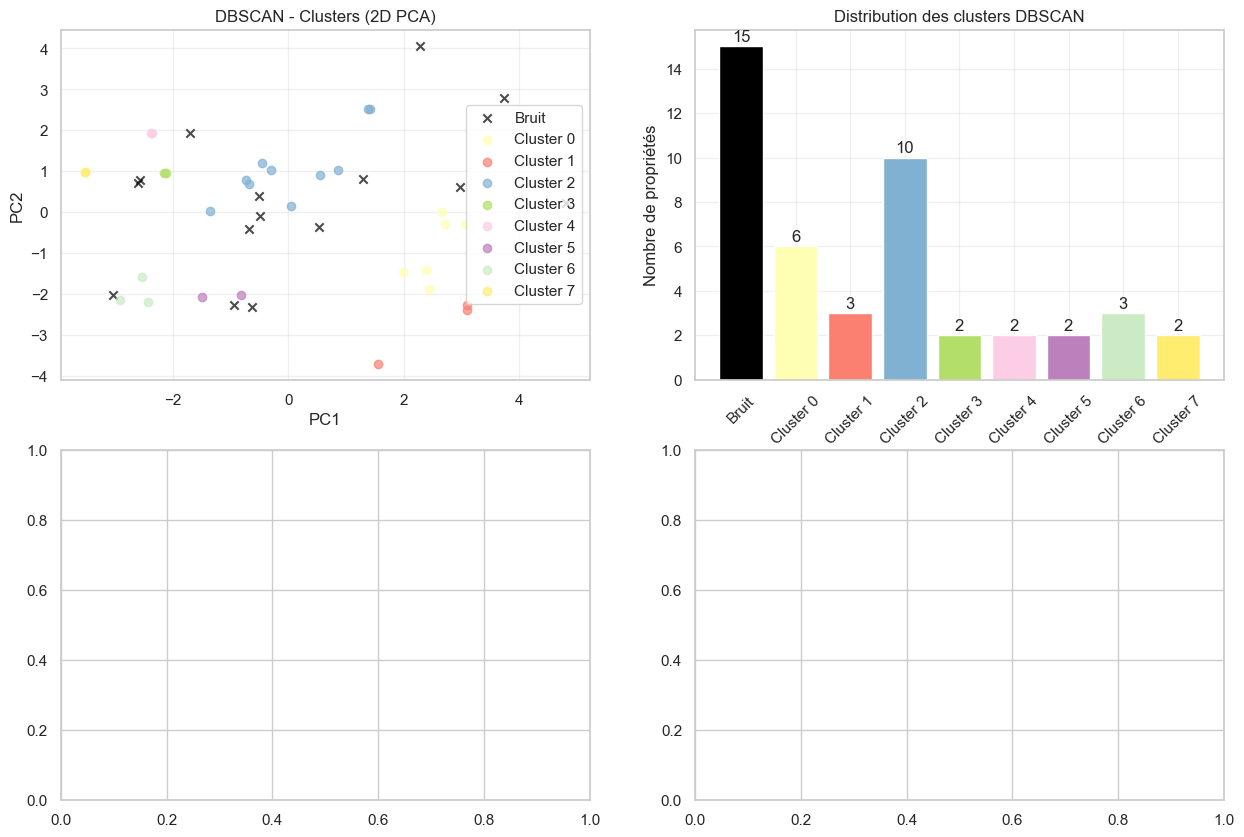

In [79]:

# Visualisation DBSCAN avec matplotlib
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Clusters DBSCAN en 2D PCA
unique_labels = sorted(set(dbscan_labels))
colors_dbscan = plt.cm.Set3(np.linspace(0, 1, len(unique_labels)))

for i, label in enumerate(unique_labels):
    mask = dbscan_labels == label
    if label == -1:
        # Points de bruit en noir
        axes[0,0].scatter(df_pca.iloc[mask, 0], df_pca.iloc[mask, 1], 
                         c='black', label='Bruit', alpha=0.7, marker='x')
    else:
        axes[0,0].scatter(df_pca.iloc[mask, 0], df_pca.iloc[mask, 1], 
                         c=[colors_dbscan[i]], label=f'Cluster {label}', alpha=0.7)

axes[0,0].set_xlabel('PC1')
axes[0,0].set_ylabel('PC2')
axes[0,0].set_title('DBSCAN - Clusters (2D PCA)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Distribution des clusters DBSCAN
cluster_counts_dbscan = pd.Series(dbscan_labels).value_counts().sort_index()
cluster_names = ['Bruit' if idx == -1 else f'Cluster {idx}' for idx in cluster_counts_dbscan.index]
bar_colors = ['black' if idx == -1 else colors_dbscan[i] for i, idx in enumerate(cluster_counts_dbscan.index)]

bars = axes[0,1].bar(range(len(cluster_counts_dbscan)), cluster_counts_dbscan.values, color=bar_colors)
axes[0,1].set_xticks(range(len(cluster_counts_dbscan)))
axes[0,1].set_xticklabels(cluster_names, rotation=45)
axes[0,1].set_ylabel('Nombre de propri√©t√©s')
axes[0,1].set_title('Distribution des clusters DBSCAN')
axes[0,1].grid(True, alpha=0.3)

# Ajouter les valeurs sur les barres
for bar, count in zip(bars, cluster_counts_dbscan.values):
    axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                   str(count), ha='center', va='bottom')



In [80]:
# Analyse DBSCAN: 
print(f"‚Ä¢ Param√®tres DBSCAN: eps={dbscan_metrics['eps']:.3f}, min_samples={dbscan_metrics['min_samples']}")
print(f"‚Ä¢ Nombre total de propri√©t√©s: {len(dbscan_labels)}")
print(f"‚Ä¢ Nombre de clusters form√©s: {dbscan_metrics['n_clusters']}")
print(f"‚Ä¢ Points de bruit: {dbscan_metrics['n_noise_points']} ({dbscan_metrics['noise_ratio']*100:.1f}%)")

if dbscan_metrics.get('silhouette_score', 0) > 0:
    print(f"‚Ä¢ Score de silhouette: {dbscan_metrics['silhouette_score']:.4f}")

# Analyser la distribution des clusters
unique_labels = set(dbscan_labels)
cluster_distribution = {}

print(f"\nüìà DISTRIBUTION D√âTAILL√âE:")
for label in sorted(unique_labels):
    count = sum(dbscan_labels == label)
    percentage = (count / len(dbscan_labels)) * 100
    cluster_distribution[label] = count
    
    if label == -1:
        print(f"üîç BRUIT: {count} propri√©t√©s ({percentage:.1f}%)")
    else:
        print(f"üè∑Ô∏è CLUSTER {label}: {count} propri√©t√©s ({percentage:.1f}%)")

# ===================================================================
# 2. INTERPR√âTATION DE LA QUALIT√â DU CLUSTERING
# ===================================================================

print(f"\nüéØ √âVALUATION DE LA QUALIT√â:")
print("="*40)

# √âvaluer la qualit√© selon diff√©rents crit√®res
noise_ratio = dbscan_metrics['noise_ratio']
n_clusters = dbscan_metrics['n_clusters']

# Crit√®res de qualit√©
print(f"\nüìä CRIT√àRES D'√âVALUATION:")

# 1. Ratio de bruit
if noise_ratio < 0.1:
    noise_quality = "EXCELLENT"
    noise_emoji = "‚úÖ"
elif noise_ratio < 0.2:
    noise_quality = "BON"
    noise_emoji = "üëç"
elif noise_ratio < 0.4:
    noise_quality = "ACCEPTABLE"
    noise_emoji = "‚ö†Ô∏è"
else:
    noise_quality = "PROBL√âMATIQUE"
    noise_emoji = "‚ùå"

print(f"{noise_emoji} Ratio de bruit: {noise_ratio*100:.1f}% - {noise_quality}")

# 2. Nombre de clusters
if n_clusters == 0:
    cluster_quality = "AUCUN CLUSTER"
    cluster_emoji = "‚ùå"
elif n_clusters == 1:
    cluster_quality = "UN SEUL GROUPE"
    cluster_emoji = "‚ö†Ô∏è"
elif 2 <= n_clusters <= 4:
    cluster_quality = "OPTIMAL"
    cluster_emoji = "‚úÖ"
else:
    cluster_quality = "TROP FRAGMENT√â"
    cluster_emoji = "‚ö†Ô∏è"

print(f"{cluster_emoji} Nombre de clusters: {n_clusters} - {cluster_quality}")

# 3. Taille des clusters
min_cluster_size = min([count for label, count in cluster_distribution.items() if label != -1], default=0)
if min_cluster_size >= 3:
    size_quality = "CLUSTERS VIABLES"
    size_emoji = "‚úÖ"
elif min_cluster_size >= 2:
    size_quality = "CLUSTERS PETITS"
    size_emoji = "‚ö†Ô∏è"
else:
    size_quality = "CLUSTERS TROP PETITS"
    size_emoji = "‚ùå"

print(f"{size_emoji} Taille minimale des clusters: {min_cluster_size} - {size_quality}")

# ===================================================================
# 3. ANALYSE D√âTAILL√âE PAR CLUSTER
# ===================================================================

print(f"\nüîç ANALYSE D√âTAILL√âE PAR CLUSTER:")
print("="*50)

# Cr√©er un DataFrame avec les donn√©es originales et les clusters
filtered_with_dbscan = filtered_3_clusters.copy()
filtered_with_dbscan['Cluster_DBSCAN'] = dbscan_labels

# Analyser chaque cluster individuellement
for label in sorted(unique_labels):
    cluster_data = filtered_with_dbscan[filtered_with_dbscan['Cluster_DBSCAN'] == label]
    
    if label == -1:
        print(f"\nüîç ANALYSE DES POINTS DE BRUIT - {len(cluster_data)} propri√©t√©s")
        print("-" * 60)
        print("‚ùì QUE REPR√âSENTENT CES PROPRI√âT√âS ?")
        print("‚Ä¢ Propri√©t√©s avec des caract√©ristiques UNIQUES/ATYPIQUES")
        print("‚Ä¢ Ne ressemblent √† aucun autre groupe")
        print("‚Ä¢ Peuvent √™tre des OPPORTUNIT√âS ou des PROBL√àMES")
        
    else:
        print(f"\nüè∑Ô∏è CLUSTER {label} - {len(cluster_data)} propri√©t√©s")
        print("-" * 50)
        print(f"üéØ PROFIL DU GROUPE:")
    
    # Analyser les caract√©ristiques du cluster/bruit
    if len(cluster_data) > 0:
        
        # 1. PRIX
        if 'price' in cluster_data.columns:
            prix_stats = {
                'moyenne': cluster_data['price'].mean(),
                'mediane': cluster_data['price'].median(), 
                'min': cluster_data['price'].min(),
                'max': cluster_data['price'].max(),
                'ecart_type': cluster_data['price'].std()
            }
            
            print(f"üí∞ PRIX DE LOCATION:")
            print(f"   ‚Ä¢ Moyenne: {prix_stats['moyenne']:.0f} TND/mois")
            print(f"   ‚Ä¢ M√©diane: {prix_stats['mediane']:.0f} TND/mois")
            print(f"   ‚Ä¢ Range: {prix_stats['min']:.0f} - {prix_stats['max']:.0f} TND")
            if len(cluster_data) > 1:
                print(f"   ‚Ä¢ √âcart-type: {prix_stats['ecart_type']:.0f} TND")
            
            # Comparer √† la moyenne g√©n√©rale
            prix_moyen_general = filtered_with_dbscan['price'].mean()
            difference = prix_stats['moyenne'] - prix_moyen_general
            if abs(difference) > 50:  # Si diff√©rence significative
                direction = "PLUS CHER" if difference > 0 else "MOINS CHER"
                print(f"   üìä {direction} que la moyenne g√©n√©rale ({difference:+.0f} TND)")
        
        # 2. SUPERFICIE
        if 'size' in cluster_data.columns:
            size_stats = {
                'moyenne': cluster_data['size'].mean(),
                'min': cluster_data['size'].min(),
                'max': cluster_data['size'].max()
            }
            
            print(f"üìê SUPERFICIE:")
            print(f"   ‚Ä¢ Moyenne: {size_stats['moyenne']:.0f} m¬≤")
            print(f"   ‚Ä¢ Range: {size_stats['min']:.0f} - {size_stats['max']:.0f} m¬≤")
        
        # 3. NOMBRE DE PI√àCES
        if 'rooms' in cluster_data.columns:
            rooms_avg = cluster_data['rooms'].mean()
            print(f"üè† PI√àCES: {rooms_avg:.1f} en moyenne")
        
        # 4. LOCALISATION
        if 'neighborhood' in cluster_data.columns and not cluster_data['neighborhood'].dropna().empty:
            quartiers = cluster_data['neighborhood'].value_counts()
            print(f"üèòÔ∏è QUARTIERS PRINCIPAUX:")
            for quartier, count in quartiers.head(3).items():
                percentage = (count / len(cluster_data)) * 100
                print(f"   ‚Ä¢ {quartier}: {count} propri√©t√©s ({percentage:.0f}%)")
        
        # 5. √âTAT DES PROPRI√âT√âS
        if 'condition' in cluster_data.columns and not cluster_data['condition'].dropna().empty:
            conditions = cluster_data['condition'].value_counts()
            print(f"üîß √âTAT DES PROPRI√âT√âS:")
            for condition, count in conditions.head(3).items():
                percentage = (count / len(cluster_data)) * 100
                print(f"   ‚Ä¢ {condition}: {count} propri√©t√©s ({percentage:.0f}%)")
        
        # 6. FINITIONS
        if 'finishing' in cluster_data.columns and not cluster_data['finishing'].dropna().empty:
            finitions = cluster_data['finishing'].value_counts()
            print(f"‚ú® FINITIONS:")
            for finition, count in finitions.head(3).items():
                percentage = (count / len(cluster_data)) * 100
                print(f"   ‚Ä¢ {finition}: {count} propri√©t√©s ({percentage:.0f}%)")
        
        # 7. √âQUIPEMENTS (si disponibles)
        equipment_cols = ['air_conditioning', 'elevator', 'garden', 'equipped_kitchen', 'swimming_pool']
        available_equipment = [col for col in equipment_cols if col in cluster_data.columns]
        
        if available_equipment:
            print(f"‚ö° √âQUIPEMENTS:")
            for equip in available_equipment:
                if cluster_data[equip].dtype in ['int64', 'float64']:
                    percentage = (cluster_data[equip] == 1).mean() * 100
                    if percentage > 0:
                        print(f"   ‚Ä¢ {equip}: {percentage:.0f}% des propri√©t√©s")

# ===================================================================
# 4. INTERPR√âTATION BUSINESS AVANC√âE
# ===================================================================

print(f"\nüíº INTERPR√âTATION BUSINESS:")
print("="*50)

# Analyser les segments de march√© identifi√©s
segments_business = {}

for label in sorted(unique_labels):
    if label == -1:
        continue  # On analyse le bruit s√©par√©ment
    
    cluster_data = filtered_with_dbscan[filtered_with_dbscan['Cluster_DBSCAN'] == label]
    
    if 'price' in cluster_data.columns and len(cluster_data) > 0:
        avg_price = cluster_data['price'].mean()
        avg_size = cluster_data['size'].mean() if 'size' in cluster_data.columns else 0
        
        # D√©terminer le segment de march√©
        price_quartiles = filtered_with_dbscan['price'].quantile([0.25, 0.5, 0.75])
        
        if avg_price <= price_quartiles[0.25]:
            segment_type = "√âCONOMIQUE"
            segment_emoji = "üí∞"
            target = "√âtudiants, jeunes professionnels, budgets serr√©s"
            strategy = "Prix comp√©titifs, localisation accessible"
        elif avg_price <= price_quartiles[0.5]:
            segment_type = "ENTR√âE DE GAMME"
            segment_emoji = "üè†"
            target = "Primo-locataires, petites familles"
            strategy = "Bon rapport qualit√©/prix, commodit√©s de base"
        elif avg_price <= price_quartiles[0.75]:
            segment_type = "MOYEN STANDING"
            segment_emoji = "üè°"
            target = "Familles, professionnels √©tablis"
            strategy = "Confort, √©quipements, quartiers r√©sidentiels"
        else:
            segment_type = "HAUT DE GAMME"
            segment_emoji = "üíé"
            target = "Cadres, expatri√©s, client√®le ais√©e"
            strategy = "Luxe, services premium, localisations privil√©gi√©es"
        
        segments_business[label] = {
            'type': segment_type,
            'emoji': segment_emoji,
            'count': len(cluster_data),
            'avg_price': avg_price,
            'avg_size': avg_size,
            'target': target,
            'strategy': strategy
        }
        
        print(f"\n{segment_emoji} CLUSTER {label}: SEGMENT {segment_type}")
        print(f"   üìä {len(cluster_data)} propri√©t√©s ({len(cluster_data)/len(filtered_with_dbscan)*100:.1f}% du march√©)")
        print(f"   üí∞ Prix moyen: {avg_price:.0f} TND/mois")
        if avg_size > 0:
            print(f"   üìê Superficie moyenne: {avg_size:.0f} m¬≤")
        print(f"   üéØ Cible: {target}")
        print(f"   üí° Strat√©gie: {strategy}")

# Analyser les points de bruit sp√©cifiquement
bruit_data = filtered_with_dbscan[filtered_with_dbscan['Cluster_DBSCAN'] == -1]

if len(bruit_data) > 0:
    print(f"\nüîç ANALYSE SP√âCIALE: POINTS DE BRUIT")
    print("-" * 50)
    print(f"üéØ OPPORTUNIT√âS POTENTIELLES:")
    
    if 'price' in bruit_data.columns:
        prix_bruit = bruit_data['price'].tolist()
        prix_median_general = filtered_with_dbscan['price'].median()
        
        print(f"üí∞ Prix des propri√©t√©s atypiques: {prix_bruit}")
        print(f"üìä Prix m√©dian g√©n√©ral: {prix_median_general:.0f} TND")
        
        # Identifier les bonnes affaires potentielles
        bonnes_affaires = bruit_data[bruit_data['price'] < prix_median_general]
        proprietes_cheres = bruit_data[bruit_data['price'] > prix_median_general]
        
        if len(bonnes_affaires) > 0:
            print(f"‚úÖ BONNES AFFAIRES POTENTIELLES: {len(bonnes_affaires)} propri√©t√©s")
            print(f"   ‚Ä¢ Prix sous la m√©diane du march√©")
            print(f"   ‚Ä¢ √Ä investiguer: raison du prix bas?")
        
        if len(proprietes_cheres) > 0:
            print(f"üíé PROPRI√âT√âS PREMIUM UNIQUES: {len(proprietes_cheres)} propri√©t√©s")
            print(f"   ‚Ä¢ Caract√©ristiques exceptionnelles")
            print(f"   ‚Ä¢ Segments de niche")

# ===================================================================
# 5. RECOMMANDATIONS D'ACTIONS
# ===================================================================

print(f"\nüöÄ RECOMMANDATIONS D'ACTIONS:")
print("="*50)

print(f"\nüìà STRAT√âGIES PAR CLUSTER:")
for label, info in segments_business.items():
    print(f"\n{info['emoji']} CLUSTER {label} ({info['type']}):")
    print(f"   üìä Marketing: Cibler {info['target'].lower()}")
    print(f"   üí° Positionnement: {info['strategy']}")
    
    # Recommandations sp√©cifiques selon la taille du cluster
    if info['count'] >= 3:
        print(f"   ‚úÖ Segment viable: d√©velopper l'offre")
    else:
        print(f"   ‚ö†Ô∏è Petit segment: analyser la demande")

print(f"\nüîç ACTIONS POUR LES POINTS DE BRUIT:")
if len(bruit_data) > 0:
    print(f"‚Ä¢ V√©rifier la qualit√© des donn√©es")
    print(f"‚Ä¢ Investiguer les raisons de l'atypisme")
    print(f"‚Ä¢ Identifier les opportunit√©s de niche")
    print(f"‚Ä¢ Contr√¥ler les prix aberrants")
else:
    print(f"‚Ä¢ Aucun point de bruit d√©tect√©")
    print(f"‚Ä¢ March√© homog√®ne et pr√©visible")

# ===================================================================
# 6. CONCLUSION G√âN√âRALE
# ===================================================================

print(f"\nüéØ CONCLUSION G√âN√âRALE:")
print("="*30)

if n_clusters >= 2 and noise_ratio < 0.3:
    print(f"‚úÖ DBSCAN A R√âUSSI √Ä SEGMENTER VOS DONN√âES")
    print(f"   ‚Ä¢ {n_clusters} segments naturels identifi√©s")
    print(f"   ‚Ä¢ {dbscan_metrics['n_noise_points']} propri√©t√©s atypiques d√©tect√©es")
    print(f"   ‚Ä¢ Segmentation applicable pour le business")
    
    # Identifier le segment principal
    main_cluster = max(segments_business.items(), key=lambda x: x[1]['count'])
    print(f"\nüéñÔ∏è SEGMENT PRINCIPAL: {main_cluster[1]['type']}")
    print(f"   ‚Ä¢ {main_cluster[1]['count']} propri√©t√©s")
    print(f"   ‚Ä¢ Repr√©sente le c≈ìur de votre march√©")

elif n_clusters == 1:
    print(f"‚ö†Ô∏è MARCH√â TR√àS HOMOG√àNE")
    print(f"   ‚Ä¢ Un seul groupe principal d√©tect√©")
    print(f"   ‚Ä¢ Peu de diff√©renciation dans l'offre")
    print(f"   ‚Ä¢ Opportunit√© de cr√©er des niches")

elif n_clusters == 0:
    print(f"‚ùå DONN√âES TROP DISPERS√âES")
    print(f"   ‚Ä¢ DBSCAN n'a trouv√© aucun cluster")
    print(f"   ‚Ä¢ Tous les points consid√©r√©s comme du bruit")
    print(f"   ‚Ä¢ Recommandation: utiliser K-Means")

else:
    print(f"‚ö†Ô∏è SEGMENTATION COMPLEXE")
    print(f"   ‚Ä¢ {n_clusters} clusters d√©tect√©s")
    print(f"   ‚Ä¢ March√© tr√®s fragment√©")
    print(f"   ‚Ä¢ Analyser la viabilit√© de chaque segment")

print(f"\nüíæ DONN√âES DISPONIBLES:")
print(f"‚Ä¢ filtered_with_dbscan: DataFrame avec clusters DBSCAN")
print(f"‚Ä¢ dbscan_labels: labels des clusters pour chaque propri√©t√©")
print(f"‚Ä¢ dbscan_metrics: m√©triques de performance")

‚Ä¢ Param√®tres DBSCAN: eps=2.500, min_samples=2
‚Ä¢ Nombre total de propri√©t√©s: 45
‚Ä¢ Nombre de clusters form√©s: 8
‚Ä¢ Points de bruit: 15 (33.3%)
‚Ä¢ Score de silhouette: 0.5541

üìà DISTRIBUTION D√âTAILL√âE:
üîç BRUIT: 15 propri√©t√©s (33.3%)
üè∑Ô∏è CLUSTER 0: 6 propri√©t√©s (13.3%)
üè∑Ô∏è CLUSTER 1: 3 propri√©t√©s (6.7%)
üè∑Ô∏è CLUSTER 2: 10 propri√©t√©s (22.2%)
üè∑Ô∏è CLUSTER 3: 2 propri√©t√©s (4.4%)
üè∑Ô∏è CLUSTER 4: 2 propri√©t√©s (4.4%)
üè∑Ô∏è CLUSTER 5: 2 propri√©t√©s (4.4%)
üè∑Ô∏è CLUSTER 6: 3 propri√©t√©s (6.7%)
üè∑Ô∏è CLUSTER 7: 2 propri√©t√©s (4.4%)

üéØ √âVALUATION DE LA QUALIT√â:

üìä CRIT√àRES D'√âVALUATION:
‚ö†Ô∏è Ratio de bruit: 33.3% - ACCEPTABLE
‚ö†Ô∏è Nombre de clusters: 8 - TROP FRAGMENT√â
‚ö†Ô∏è Taille minimale des clusters: 2 - CLUSTERS PETITS

üîç ANALYSE D√âTAILL√âE PAR CLUSTER:

üîç ANALYSE DES POINTS DE BRUIT - 15 propri√©t√©s
------------------------------------------------------------
‚ùì QUE REPR√âSENTENT CES PROPRI√âT√âS ?
‚Ä¢ Propri√©t

## CAH

Application de CAH avec m√©thode 'ward' et distance 'euclidean'...
√âvaluation du nombre optimal de clusters...
Nombre optimal de clusters: 10
Score de silhouette: 0.3322
M√©thode de liaison: ward
üìä Affichage du dendrogramme...


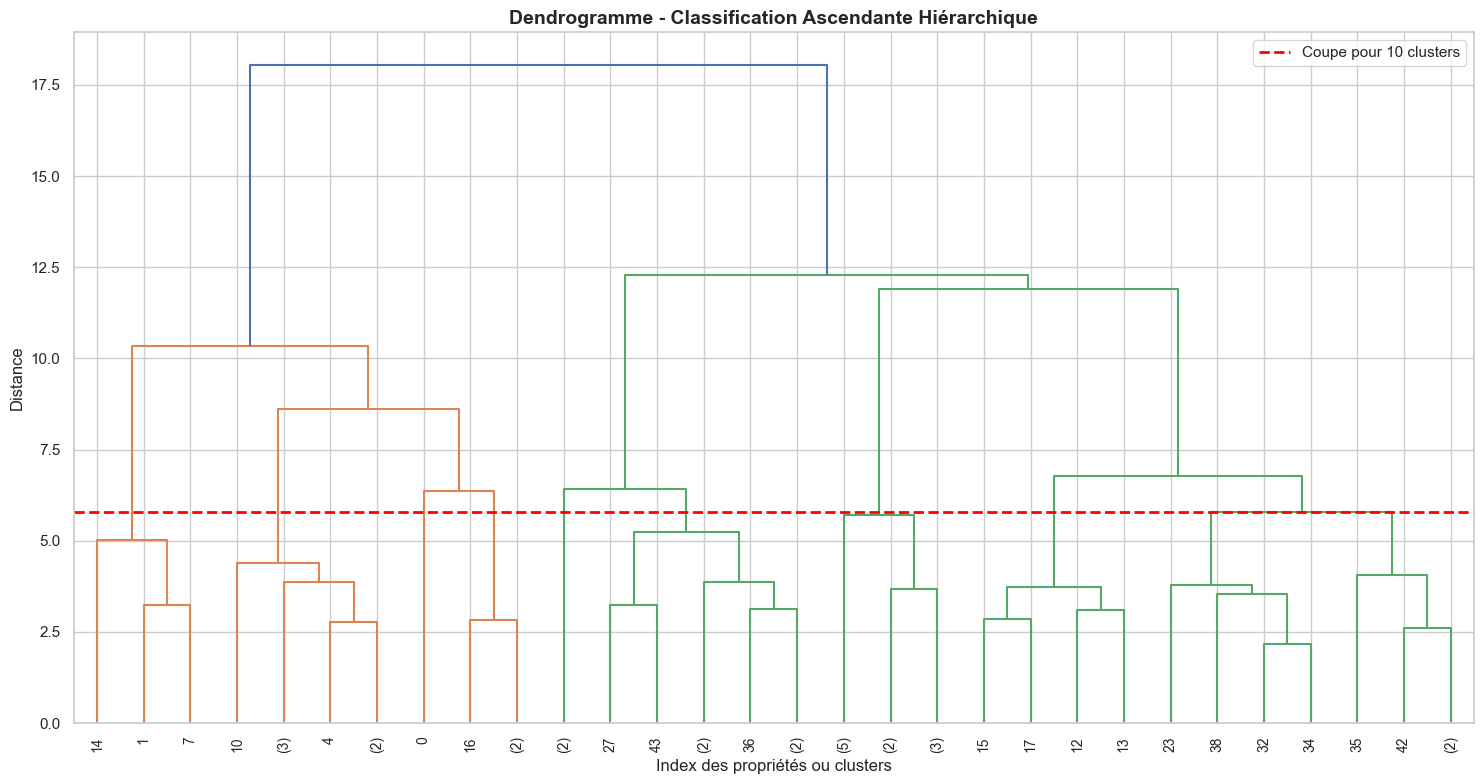

‚úÖ Dendrogramme affich√© avec 10 clusters optimaux!


In [ ]:
# CAH avec m√©thode Ward pour les appartements mis √† la vente √† La Soukra  (>150 observations)

# 1 -  CAH
linkage_matrix, cluster_labels, optimal_n_clusters, metrics = model_functions.apply_cah_clustering(
    df_scaled, 
    max_clusters=10, 
    linkage_method='ward'
)

print("üìä Affichage du dendrogramme...")
from scipy.cluster.hierarchy import dendrogram

# Cr√©er la figure
plt.figure(figsize=(15, 8))

try:
    # Cr√©er le dendrogramme avec vos donn√©es existantes
    dend = dendrogram(
        linkage_matrix,
        truncate_mode='lastp' if len(linkage_matrix) > 30 else None,
        p=30 if len(linkage_matrix) > 30 else None,
        show_leaf_counts=True,
        leaf_rotation=90,
        leaf_font_size=10
    )
    
    # Personnaliser
    plt.title('Dendrogramme - Classification Ascendante Hi√©rarchique', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Index des propri√©t√©s ou clusters')
    plt.ylabel('Distance')
    
    # Ajouter ligne de coupe pour le nombre optimal de clusters
    if optimal_n_clusters > 1:
        distances = linkage_matrix[:, 2]
        sorted_distances = np.sort(distances)[::-1]  # Ordre d√©croissant
        
        if len(sorted_distances) >= optimal_n_clusters - 1:
            cut_height = sorted_distances[optimal_n_clusters - 2]
            plt.axhline(y=cut_height, color='red', linestyle='--', linewidth=2,
                       label=f'Coupe pour {optimal_n_clusters} clusters')
            plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    print(f"‚úÖ Dendrogramme affich√© avec {optimal_n_clusters} clusters optimaux!")
    
except Exception as e:
    print(f"Erreur: {e}")
    print("Tentative version simplifi√©e...")
    
    # Version de secours
    plt.figure(figsize=(12, 6))
    dend = dendrogram(linkage_matrix, leaf_rotation=90)
    plt.title('Dendrogramme')
    plt.show()
    print("‚úÖ Version simplifi√©e affich√©e!")
